# <center> <Font color ="Blue"> Credit Consumption For Customer </font></center>

### Importing the Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns",None)


import dabl

In [2]:
path = os.getcwd()
path

'C:\\Users\\admin'

In [3]:
os.chdir('G:\FullStack AI\Machine Learning Projects\Capstone Case Study - Predict Cred Card Consumption')

os.getcwd()

'G:\\FullStack AI\\Machine Learning Projects\\Capstone Case Study - Predict Cred Card Consumption'

### Importing the Data

In [4]:
creditconsumption = pd.read_excel("CreditConsumptionData.xlsx")
customerbehavior = pd.read_excel('CustomerBehaviorData.xlsx')
customerdemographics = pd.read_excel('CustomerDemographics.xlsx')

####  Analysing the Variables and Shape of the Data Frames 

In [5]:
creditconsumption.shape

(20000, 2)

In [6]:
creditconsumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [7]:
creditconsumption.isna().sum()

ID            0
cc_cons    5000
dtype: int64

In [8]:
creditconsumption.sample(2)

,ID,cc_cons
385,13779,10762.0
15035,16697,NaN


#### Customer Behaviour 

In [9]:
customerbehavior.shape

(20000, 39)

In [10]:
customerbehavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [11]:
customerbehavior.head(2)

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.2,130000.0,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.0,1,108,97916.0,45253.64,47635.0,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.0,3.0,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.0,1,4,25125.0,12912.33,18369.0,3,49,20585.0,Y,3812.69


#### Customer Demographics

In [12]:
customerdemographics.shape

(20000, 10)

In [13]:
customerdemographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [14]:
customerdemographics.sample(2)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
5089,16500,current,M,44,HIGH,12.0,1,454.0,1,8.0
1384,18065,current,M,40,MEDIUM,14.0,3,454.0,0,20.0


### Creating Customer 360 Data Set

In [15]:
df= pd.merge(customerdemographics,customerbehavior,on='ID',how='inner')

In [16]:
df.shape

(20000, 48)

In [17]:
df= pd.merge(df,creditconsumption,on='ID',how='inner')

In [18]:
df.shape

(20000, 49)

In [19]:
df.sample(4)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
14150,17455,current,M,35,MEDIUM,1.5,3,799.0,1,20.0,19176.38,19073.0,1338.65,1731.0,8575.83,1474.0,4.0,6,5,20,2,1,75000,1,1,1.0,1,75240.45,237365.38,24094.0,167.0,689.00,142338.0,52.0,3,20050.0,48506.55,102594.25,4,6,48471.0,108984.84,11312.00,5,104,29319.0,Y,3367.12,16158.0
13573,9717,current,M,47,LOW,16.2,7,958.0,0,2.0,8131.37,13743.0,19221.12,3799.0,10675.00,852.9,2.0,1,5,30,1,47,402000,1,1,1.0,1,6100.00,30453.00,1633.0,0.0,32577.50,20887.5,1.0,4,35761.0,49328.38,48870.86,2,78,33328.0,69938.12,15085.00,2,83,17202.0,Y,4438.43,17033.0
6552,10823,current,M,53,MEDIUM,9.9,9,860.0,1,4.0,3287.46,4369.0,15073.66,4062.5,27643.00,1370.0,8.0,83,17,1,3,68,50900,1,1,1.0,1,20747.50,429273.40,694.0,20324.0,99504.54,62218.0,6.0,0,15428.0,26470.66,57773.86,43,59,244809.0,59153.56,55000.25,13,38,24993.0,Y,7542.51,13560.0
2317,541,current,M,42,MEDIUM,6.6,8,638.0,0,6.0,4729.14,573.0,3123.98,1649.0,13826.00,18738.0,100.0,2,87,1,60,1,293000,1,1,1.0,1,345.60,382191.00,24619.0,14509.0,186290.13,342053.0,9.0,5,28336.0,4193.51,35889.00,2,23,26153.0,39380.45,7648.00,7,1,43500.0,Y,401.56,8577.0


#### Seperating the data into train and test

In [20]:
test_data = df[df.cc_cons.isna()]
df_train = df[~df.cc_cons.isna()]

In [21]:
df_train_copy = df_train.copy()

In [22]:
test_data.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,7998.48,2289.00,9553.00,2879.58,6881.81,3124.0,8.0,23,13,47,3,30,519000,1,1,1.0,1,13659.00,14000.00,80000.0,6885.0,79085.00,44630.50,63.0,1,48134.00,107662.02,61887.50,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,16479.64,415.00,7386.49,6763.00,12032.60,6738.0,19.0,32,7,1,37,16,402000,1,1,1.0,1,942327.70,172131.00,28912.0,553.0,85171.16,216770.95,10.0,1,31820.00,34376.79,36644.25,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,29272.03,40994.00,4170.53,26717.30,531.43,3778.0,12.0,30,44,22,15,37,114000,1,1,1.0,1,70310.60,208652.00,1036.0,1089.0,44916.42,24878.00,55.0,33,1035431.79,140182.87,50121.00,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,9662.31,5306.39,5261.00,11934.79,7996.00,293.0,24.0,85,47,4,1,1,298000,1,1,1.0,1,101891.25,100934.00,678.0,1931.0,21563.58,224329.00,32.0,7,159847.00,42694.75,24917.00,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,13239.86,7063.00,19193.13,22304.86,5984.75,4933.0,100.0,9,14,62,55,81,381000,1,1,1.0,1,27316.50,90829.65,12000.0,10455.0,59644.00,43451.00,67.0,1,57312.04,146116.14,41381.00,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


# Exploratory Data Analysis


In [23]:
df_train.head(2)

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
111,12554,current,M,35,MEDIUM,15.0,1,708.0,0,17.0,24893.00,378.0,10288.0,29664.0,16291.4,11432.0,2.0,26,10,48,14,47,430000,1,1,1.0,1,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6,25296.0,11527.50,191777.13,2,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09,20014.0
112,17645,current,M,35,HIGH,15.0,6,123.0,0,14.0,18941.62,966.0,20672.0,287.0,4217.0,885.0,1.0,7,13,3,21,31,127500,1,1,1.0,1,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36,80750.0,92276.57,71162.00,2,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34,10173.0


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 111 to 15110
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   account_type                  15000 non-null  object 
 2   gender                        15000 non-null  object 
 3   age                           15000 non-null  int64  
 4   Income                        15000 non-null  object 
 5   Emp_Tenure_Years              15000 non-null  float64
 6   Tenure_with_Bank              15000 non-null  int64  
 7   region_code                   15000 non-null  float64
 8   NetBanking_Flag               15000 non-null  int64  
 9   Avg_days_between_transaction  14999 non-null  float64
 10  cc_cons_apr                   15000 non-null  float64
 11  dc_cons_apr                   15000 non-null  float64
 12  cc_cons_may                   15000 non-null  float64
 13 

### Summary Statistics

In [25]:
df_train.describe()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14999.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,14999.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.0,15000.0,14999.0,15000.0,1.500000e+04,1.500000e+04,14998.000000,15000.000000,1.500000e+04,1.500000e+04,14999.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.499900e+04,15000.000000
mean,10032.077067,47.790600,15.184007,5.510000,598.415467,0.719533,11.049603,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.489499,33.490200,41.507000,17.171000,13.979733,30.287267,277005.147400,1.0,1.0,1.0,1.0,6.194140e+05,2.333642e+05,44440.944719,3523.049025,6.823421e+04,8.079761e+04,36.402227,11.291400,5.438954e+04,6.554492e+04,8.356935e+04,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576139e+04,55157.729867
std,5760.372343,30.632766,20.312648,2.865783,220.062345,0.449242,5.492379,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.435394,49.540999,47.342918,19.359678,17.087203,29.252490,179429.540139,0.0,0.0,0.0,0.0,3.087815e+06,4.073237e+05,88117.933782,7373.355434,1.126786e+05,1.989060e+05,30.701081,12.670785,1.950943e+05,1.016829e+05,1.776300e+05,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179191e+05,97670.972252
min,1.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,0.000000,0.000000,1.000000e+00,2.820000e+01,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,5060.500000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,8.000000,10.000000,2.000000,2.000000,4.000000,124000.000000,1.0,1.0,1.0,1.0,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.323043e+04,2.684600e+04,11.000000,2.000000,2.068300e+04,2.100333e+04,2.541027e+04,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549350e+03,6768.000000
50%,10054.000000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,23.000000,35.000000,7.000000,5.000000,17.000000,272000.000000,1.0,1.0,1.0,1.0,4.503600e+04,1.110000e+05,13873.000000,2351.000000,4.187560e+04,4.709700e+04,32.000000,5.000000,3.191500e+04,3.823568e+04,4.814000e+04,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.955280e+03,13364.000000
75%,15015.250000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,21405.000000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,43.000000,61.000000,25.000000,21.000000,54.000000,400000.000000,1.0,1.0,1.0,1.0,1.617040e+05,2.450000e+05,48950.000000,6885.000000,7.536829e+04,8.593500e+04,52.000000,19.000

### Observations
    *Age has values greater than 100 so there are some outliers.
    *Employment tenure years have data greater than 100 another sing of outliers in the data.
    * Change investment Names
    * Some Variables have same values for all customers 
    * Some investments have negative values
    * Some records have Credit card limit is 0
    
    
##### Presence of outliers
##### Some values are missing 



In [26]:
df_train[df_train.investment_4<0].shape[0]/df_train.shape[0] *100

21.5

In [27]:
df_train.personal_loan_active.value_counts()

1    15000
Name: personal_loan_active, dtype: int64

In [28]:
df_train.personal_loan_closed.value_counts()

1.0    14999
Name: personal_loan_closed, dtype: int64

In [29]:
df_train.vehicle_loan_closed.value_counts()

1    15000
Name: vehicle_loan_closed, dtype: int64

In [30]:
df_train.vehicle_loan_active.value_counts()

1    15000
Name: vehicle_loan_active, dtype: int64

###  <font color = "Maroon">Insights:</font>
1) Age has outliers.<br>
2) Emp_Tenure years has outliers<br>
3) Personal_ loan_active has 0 std, so all values are 1 - we can drop<br>
4) Vechile_loan active is same as personal_loan so we can drop<br>
5) vehicle loan closed and vehicle_loan_active  can also be droped<br>
6) Investment_4 has some 21% negative records - so can drop<br>
7)cc_cons has outliers we can see drastic difference from 75percentile  to max<br>

In [31]:
df_train.drop(columns=["vehicle_loan_closed","personal_loan_closed","personal_loan_active","investment_4","vehicle_loan_active"],inplace=True)

#### Dropping records with age greater than 100

In [32]:
df_train=df_train[df_train.age<=100]

### Categorical variable Stats

In [33]:
df_train.describe(include=object)

,account_type,gender,Income,loan_enq
count,14466,14466,14466,14464
unique,2,2,3,1
top,current,M,MEDIUM,Y
freq,12259,12482,9277,14464


In [34]:
df_train.loan_enq.value_counts() ## All values are 1 so dropping

Y    14464
Name: loan_enq, dtype: int64

In [35]:
df_train.drop(columns='loan_enq',inplace=True) # dropping loan enq

### Missing Values Treatments

In [36]:
df_train.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    1
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    1
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
investment_1                    0
investment_2                    0
investment_3                    2
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 1
credit_count_a

## Dropping Missing valuess

In [37]:
df_train.dropna(inplace=True)


In [38]:
df_train.isna().sum().sum()

0


# Univariate Anlysis

### Target Variable - Frequency Distribution of Target Variable

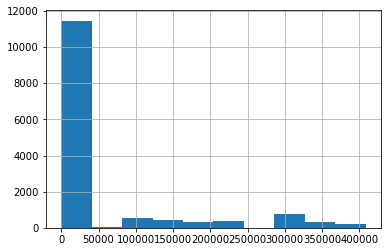

In [39]:
plt.figure(figsize=(6,4))
df_train["cc_cons"].hist()
plt.show()

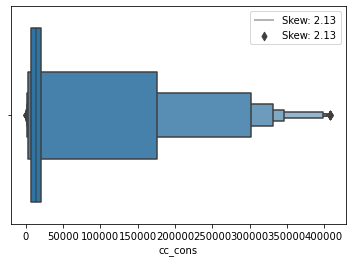

In [43]:
figs = plt.figure(figsize=(6,4))
sns.boxenplot(df_train["cc_cons"],orient="h",label ="Skew: "+str(np.round(df_train["cc_cons"].skew(),2)))
plt.legend()
plt.show()

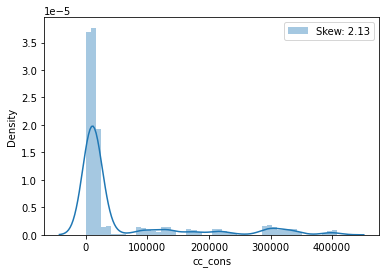

In [48]:
figs = plt.figure(figsize=(6,4))
sns.distplot(df_train["cc_cons"],label="Skew: "+str(np.round(df_train['cc_cons'].skew(),2)))
#sns.distplot(df[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
plt.legend()
    
plt.show()

##### Target Variable is Rightly sqewed 

#### Analysing Customer Demographics

In [49]:
customerdemographics.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction'],
      dtype='object')

In [50]:
demographics=customerdemographics.columns
len(demographics)

10

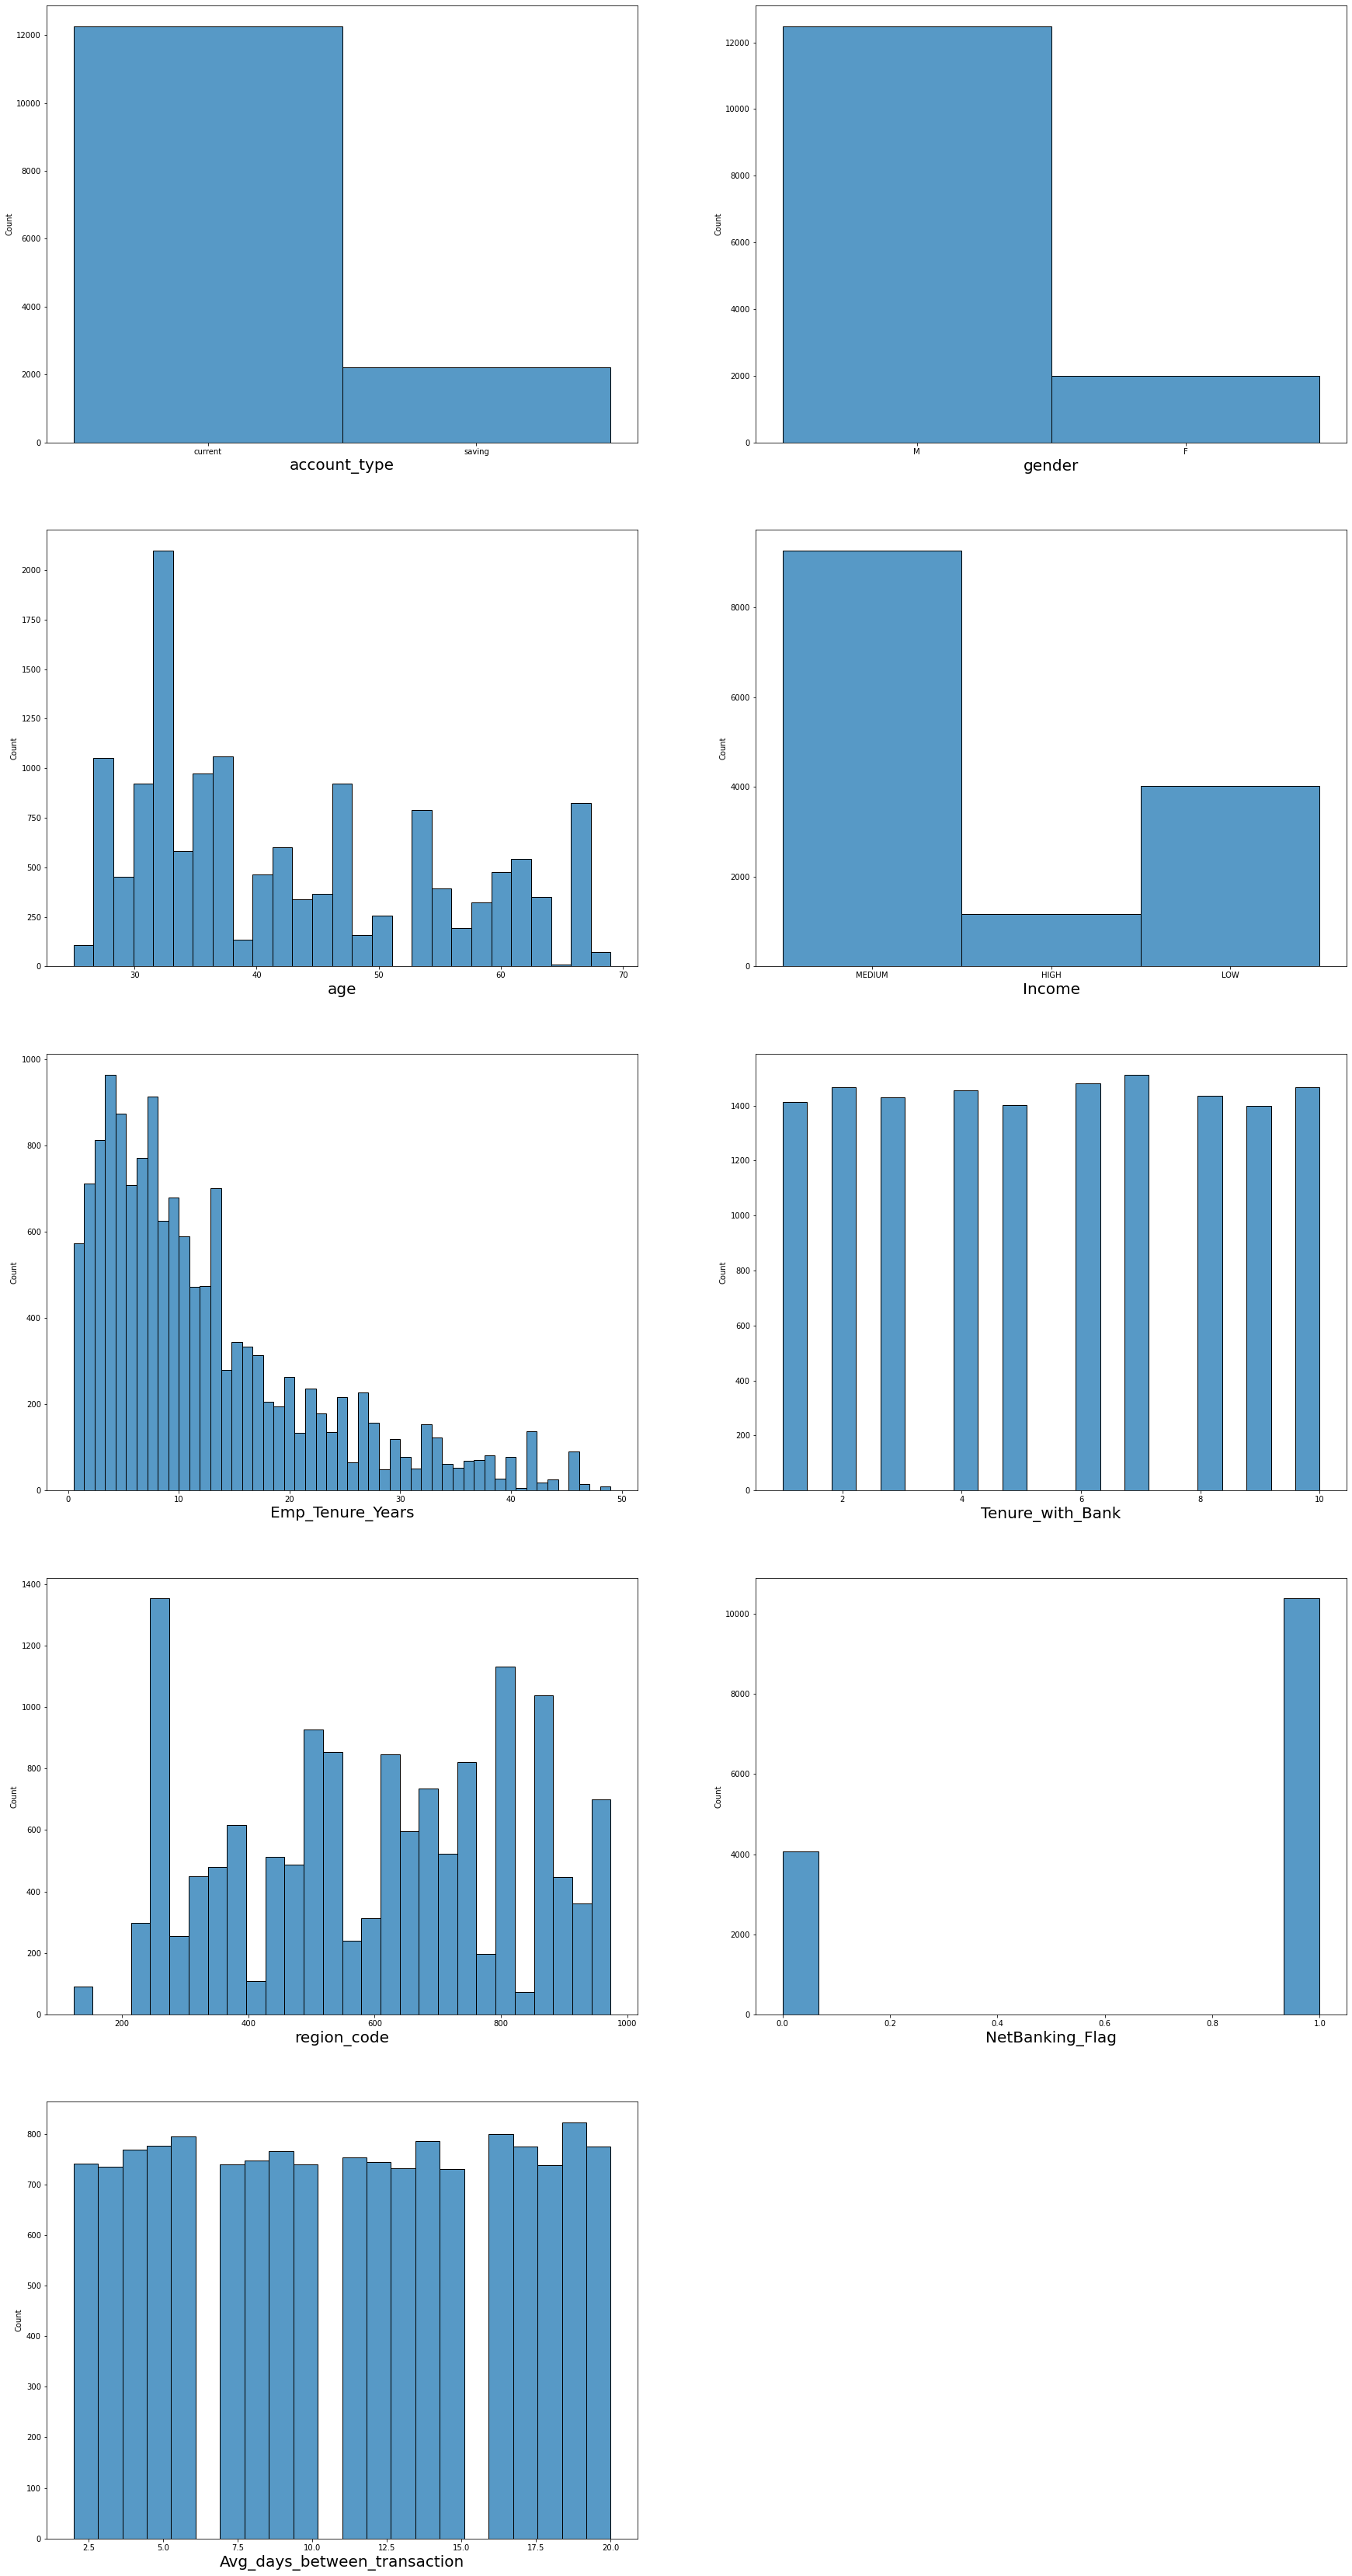

In [51]:
plt.figure(figsize=(30,60))
for i in enumerate(demographics[1:]):## Not including ID
    plt.subplot(5,2,i[0]+1)
    plt.xlabel(i[1],fontsize=20)
    #(df_train[i[1]])
    sns.histplot(df_train[i[1]])
plt.show()

In [52]:
df_train.NetBanking_Flag.value_counts()/sum(df_train.NetBanking_Flag.value_counts())

1    0.717901
0    0.282099
Name: NetBanking_Flag, dtype: float64

### Demographics Insights:

**Gender** - Male customers are More <br>
**Account type** -Current account type is More<br>
**Income** - Cat Variable with 3 types of category
    Medium 1 -> Low 2 -> High is 3<br>
**Emp Tenure** has outliers<br>
**71% of the customers** use NetBanking<br>
**Avg Day** max = 20 can be feature engineered <br>



#### Feature Engineering: Avg days between transaction

Categorizing it into following:

< 5 days<br>
5-10 days<br>
10+ days<br>

In [53]:
df_train["Avg_days_FE"] = np.where(df_train["Avg_days_between_transaction"]<5,"<5 days", np.where(((df_train['Avg_days_between_transaction']>5) & (df_train["Avg_days_between_transaction"]<10)),"5-10","10+ days"))

In [54]:
#df_train[["Avg_days_between_transaction","Avg_days_FE"]].sample(3)

In [55]:
df_train.drop(columns="Avg_days_between_transaction",inplace=True)

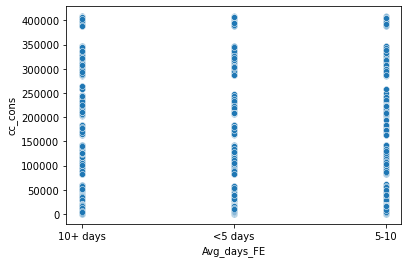

In [56]:
sns.scatterplot(x="Avg_days_FE",y='cc_cons',data=df_train)
plt.show()

In [57]:
df_train.groupby(["Avg_days_FE"])["cc_cons"].describe()

,count,mean,std,min,25%,50%,75%,max
Avg_days_FE,,,,,,,,
10+ days,9171.0,54341.841130,96551.679187,3.0,6803.00,13309.0,19993.00,408382.0
5-10,3048.0,59515.079724,102885.837259,0.0,6760.75,13624.5,23729.00,408282.0
<5 days,2244.0,52480.406863,95183.123695,13.0,6539.25,13360.0,19842.75,408347.0


#### Avg_days_FE has not much of influence on the target

## Analysing Customer_Behaviour

In [58]:
import statistics as sts

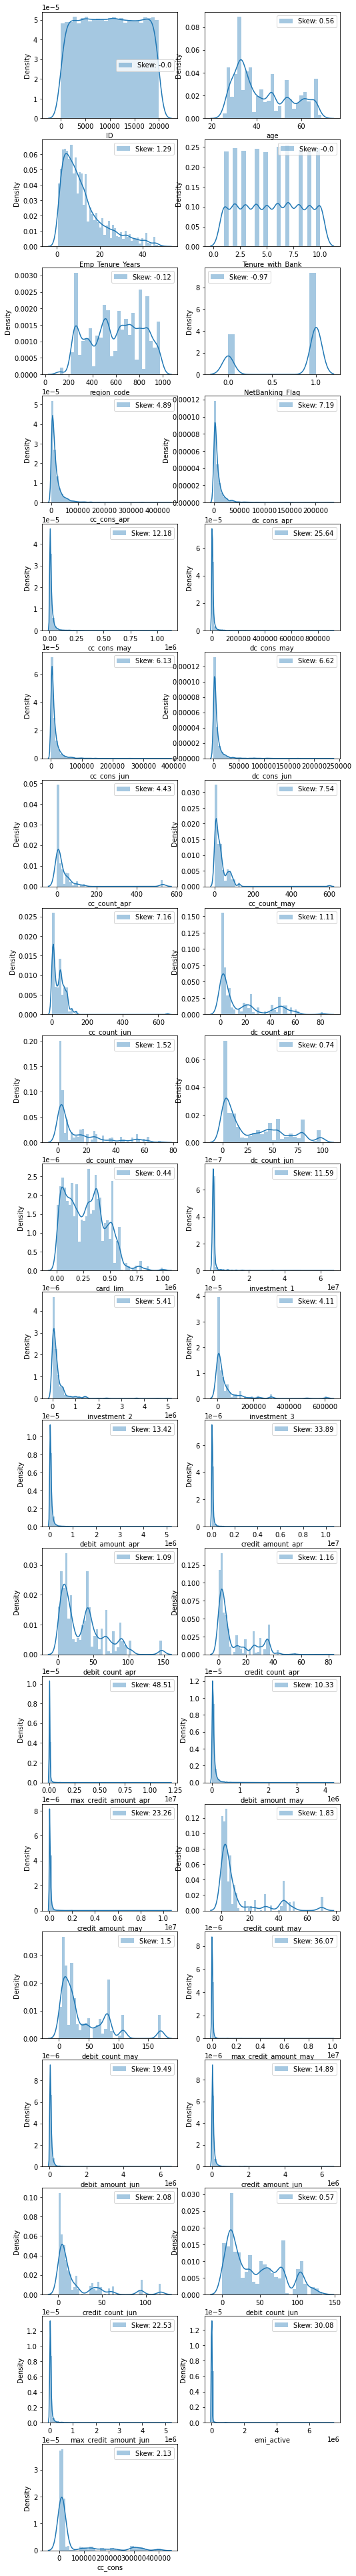

In [59]:
plt.figure(figsize=(8,70))
for i, j in enumerate(df_train.describe().columns):
    plt.subplot(20,2,i+1)
    sns.distplot(df_train[j], label="Skew: " + str(np.round((df_train[j].skew()),2)))
    #plt.title(j)
    plt.legend()

### Insights

    1) Credit card and debit card spends follows exponential distribution
    2) 84% people have current account type
    3) 86% people are from male gender
    4) Spends and ivestment have less variance compared to other variable so they have to dropped in feature selection
    5) Many variables have less variance and it is rightly skewed. Should be dropped in Feature Selection



In [ ]:
#unpivot = pd.melt(df_train, df_train.describe().columns[-1], df_train.describe().columns[:-1])
#
#g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
#g.map(sns.kdeplot, "value")
#
#plt.show()

In [ ]:
#df_train.drop(columns=["ID"],inplace=True) ## Will drop after multivariate analysis

In [ ]:
#unpivot = pd.melt(df_train, df_train.describe().columns[-1], df_train.describe().columns[:-1])
#
#g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
#g.map(sns.boxplot, "value")
#
#plt.show()

In [ ]:
#unpivot = pd.melt(df_train, df_train.describe().columns[-1], df_train.describe().columns[:-1])
#
#g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
#g.map(sns.kdeplot, "value")
#
#plt.show()

## Bi- Variate Analysis

### Plotting Features againts Target

Target looks like regression
Showing only top 10 of 32 continuous features


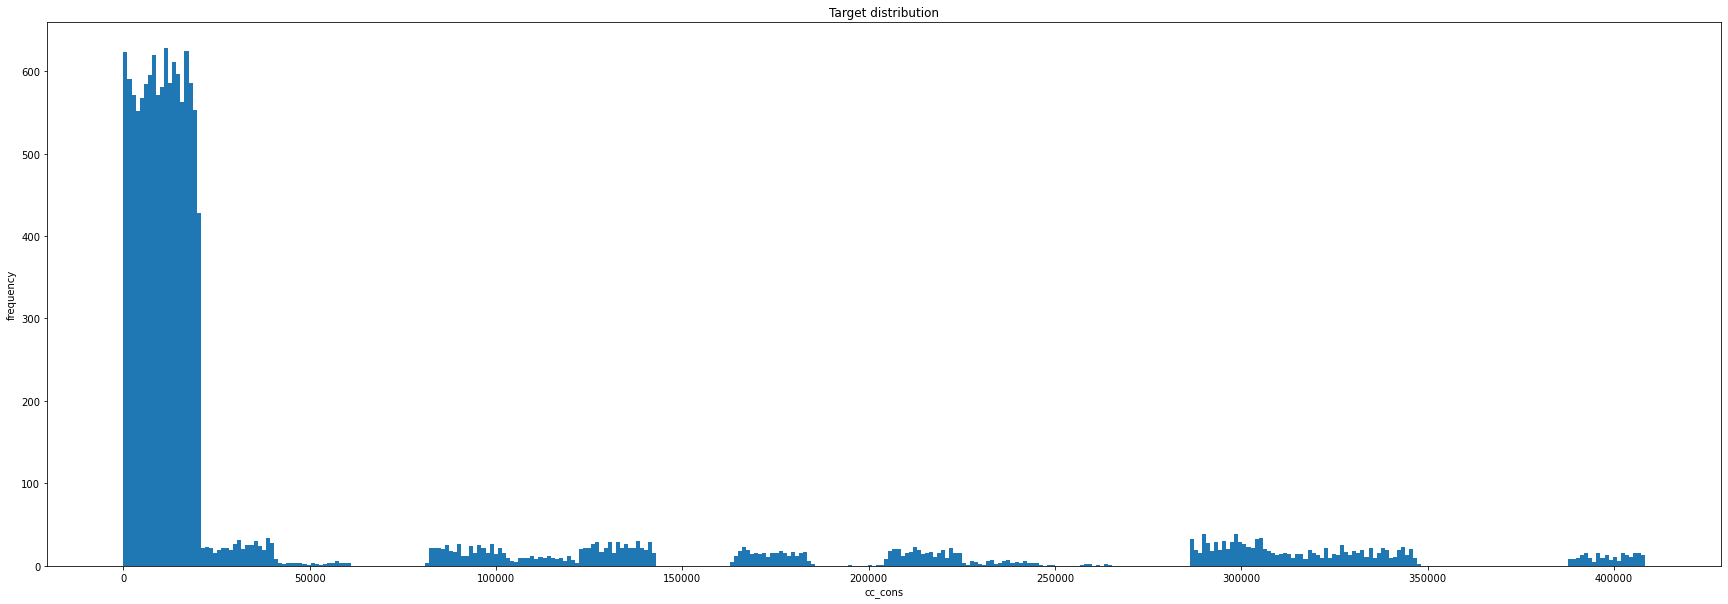

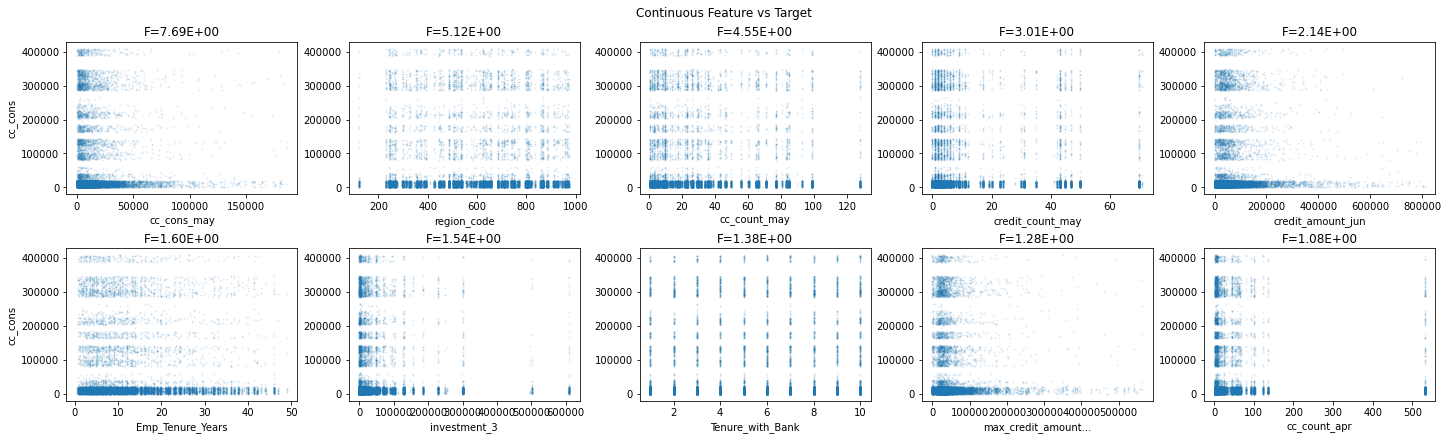

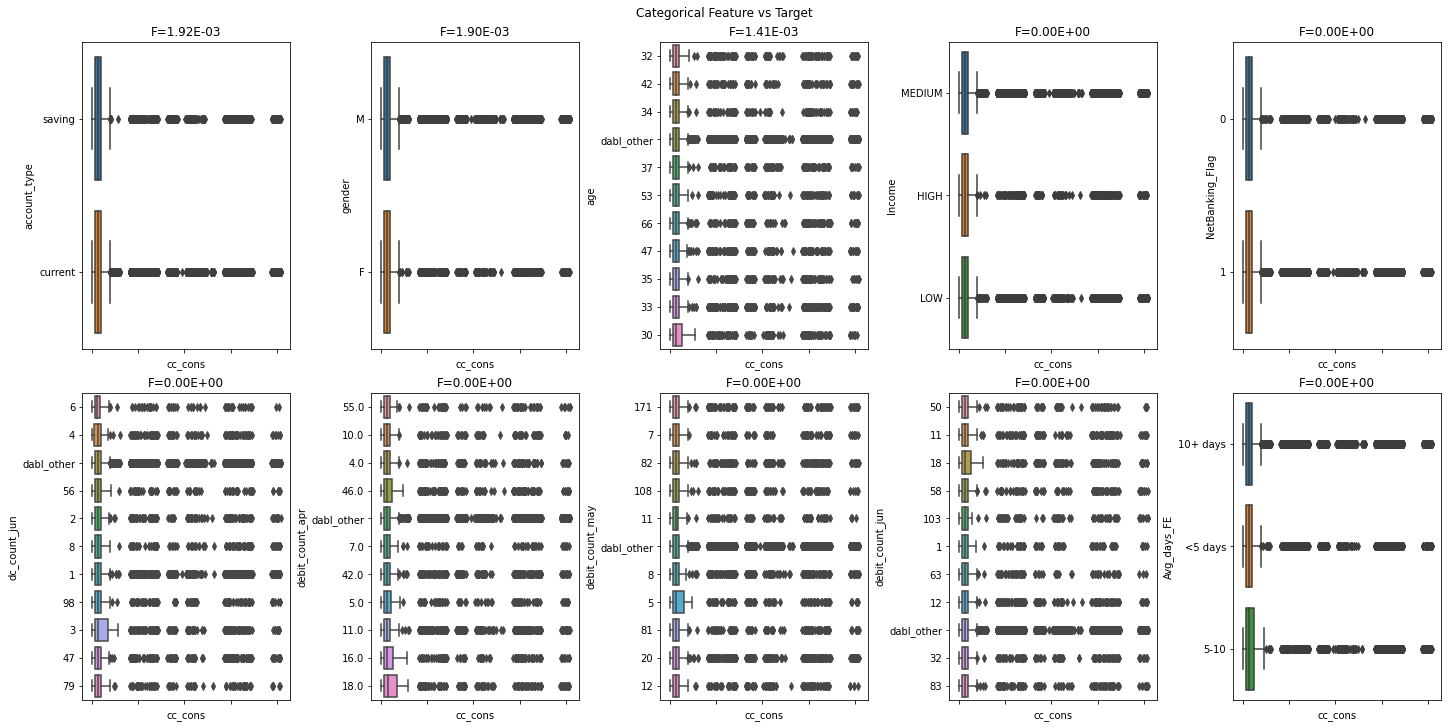

In [60]:
plt.figure(figsize=(30,10))
dabl.plot(df_train, 'cc_cons')
plt.show()

#### Observations: 
1) We can notice that the Data has lot of outliers <br>
2) No Correlation between feature and the target Variable



### Multi-variate Analysis


#### Checking Pearson Correlation

In [61]:
df_train.corr()

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,1.000000,-0.002001,0.001796,0.001727,-0.003725,-0.000370,0.007558,-0.003238,0.016264,0.008691,0.006512,0.010186,0.004077,0.003009,-0.011232,0.002020,0.002539,0.003724,-0.000082,-0.001418,-0.009042,-0.004499,0.002278,-0.005016,0.002179,0.003974,0.005433,0.002509,-0.010623,-0.011476,0.005385,-0.005846,0.002464,0.002609,-0.003094,-0.013074,-0.001006,0.001849,0.005630
age,-0.002001,1.000000,0.670199,-0.000278,0.000208,0.002770,-0.006369,-0.002885,0.006926,-0.003897,-0.010366,0.004843,0.001913,-0.010189,0.006797,-0.008414,0.000913,0.006106,0.013472,0.004099,0.000348,0.006683,0.004152,0.004598,0.000832,0.005465,-0.009008,-0.005273,0.001236,0.004916,0.014811,0.009430,0.010937,-0.002010,-0.007087,0.000763,0.001792,0.018139,-0.006234
Emp_Tenure_Years,0.001796,0.670199,1.000000,-0.007443,-0.005612,-0.007033,-0.009778,-0.005220,0.004580,0.001423,-0.021074,0.020289,0.008758,-0.016944,0.005641,-0.004532,0.012035,0.005692,0.012597,0.002411,-0.009603,-0.005385,-0.000182,0.001960,0.006199,0.012594,-0.008044,0.002526,0.002837,-0.005272,0.005323,-0.002640,0.013876,-0.001063,-0.015370,0.005285,-0.000514,0.004611,-0.010521
Tenure_with_Bank,0.001727,-0.000278,-0.007443,1.000000,-0.003019,-0.007426,-0.007909,-0.010166,0.012609,0.001597,-0.014601,-0.003525,0.009602,-0.010199,-0.005913,0.002771,0.001478,0.000299,0.003954,-0.007799,0.001472,0.011058,-0.014598,0.011634,-0.002390,0.002527,0.006069,-0.012683,-0.005078,-0.000958,0.004850,0.013388,-0.000927,0.002317,-0.011658,-0.000448,-0.004456,0.002716,0.009774
region_code,-0.003725,0.000208,-0.005612,-0.003019,1.000000,0.007026,0.006966,-0.012139,-0.011815,0.006394,-0.006210,0.012630,-0.004949,0.010621,-0.006932,-0.015122,-0.002764,-0.016469,-0.001982,-0.002762,0.008265,0.005241,0.000590,0.000422,0.001399,-0.006419,0.006642,-0.012498,0.022053,-0.009038,-0.002191,-0.002518,0.026676,0.000953,0.003107,0.013637,0.000560,0.003640,-0.018817
NetBanking_Flag,-0.000370,0.002770,-0.007033,-0.007426,0.007026,1.000000,0.002590,-0.006482,-0.001606,0.007267,-0.001733,0.000243,0.011327,0.006235,0.000813,0.011328,-0.007569,0.000365,-0.007557,0.000037,0.007942,-0.009675,-0.016290,0.001351,-0.005714,-0.011444,0.006564,0.002715,-0.002947,0.012533,-0.013815,0.003817,-0.017262,0.005268,0.011807,0.001954,0.000371,0.006200,0.002670
cc_cons_apr,0.007558,-0.006369,-0.009778,-0.007909,0.006966,0.002590,1.000000,-0.001359,0.002427,0.002659,0.006156,-0.004413,-0.004413,0.009159,0.009731,0.003733,-0.003114,0.009144,0.009596,0.011300,-0.002257,0.000536,-0.003346,0.006963,0.000287,0.002017,-0.008270,0.000532,-0.000183,-0.002679,0.002735,-0.003007,0.004017,-0.007723,-0.010358,0.014681,-0.002040,0.000271,0.005300
dc_cons_apr,-0.003238,-0.002885,-0.005220,-0.010166,-0.012139,-0.006482,-0.001359,1.000000,0.007572,-0.010466,0.006727,-0.004980,0.004644,0.000369,0.008669,0.004690,-0.001824,0.004989,-0.009747,0.002927,-0.005813,-0.015204,-0.001185,0.004296,-0.001190,-0.004966,-0.007925,-0.008655,0.008549,-0.000829,-0.000501,0.003628,-0.000583,-0.007506,-0.007643,-0.001478,-0.017288,0.001222,0.000375
cc_cons_may,0.016264,0.006926,0.004580,0.012609,-0.011815,-0.001606,0.002427,0.007572,1.000000,-0.009204,-0.010625,0.001575,-0.010334,0.000253,-0.011195,-0.006368,-0.011439,-0.005741,-0.010006,0.002245,0.001286,0.004963,0.005107,-0.001661,0.014089,-0.016685,0.007127,0.000700,0.010130,-0.005560,-0.001122,0.010227,-0.005347,0.009624,0.001979,-0.015450,-0.002463,0.000801,0.023055
dc_cons_may,0.008691

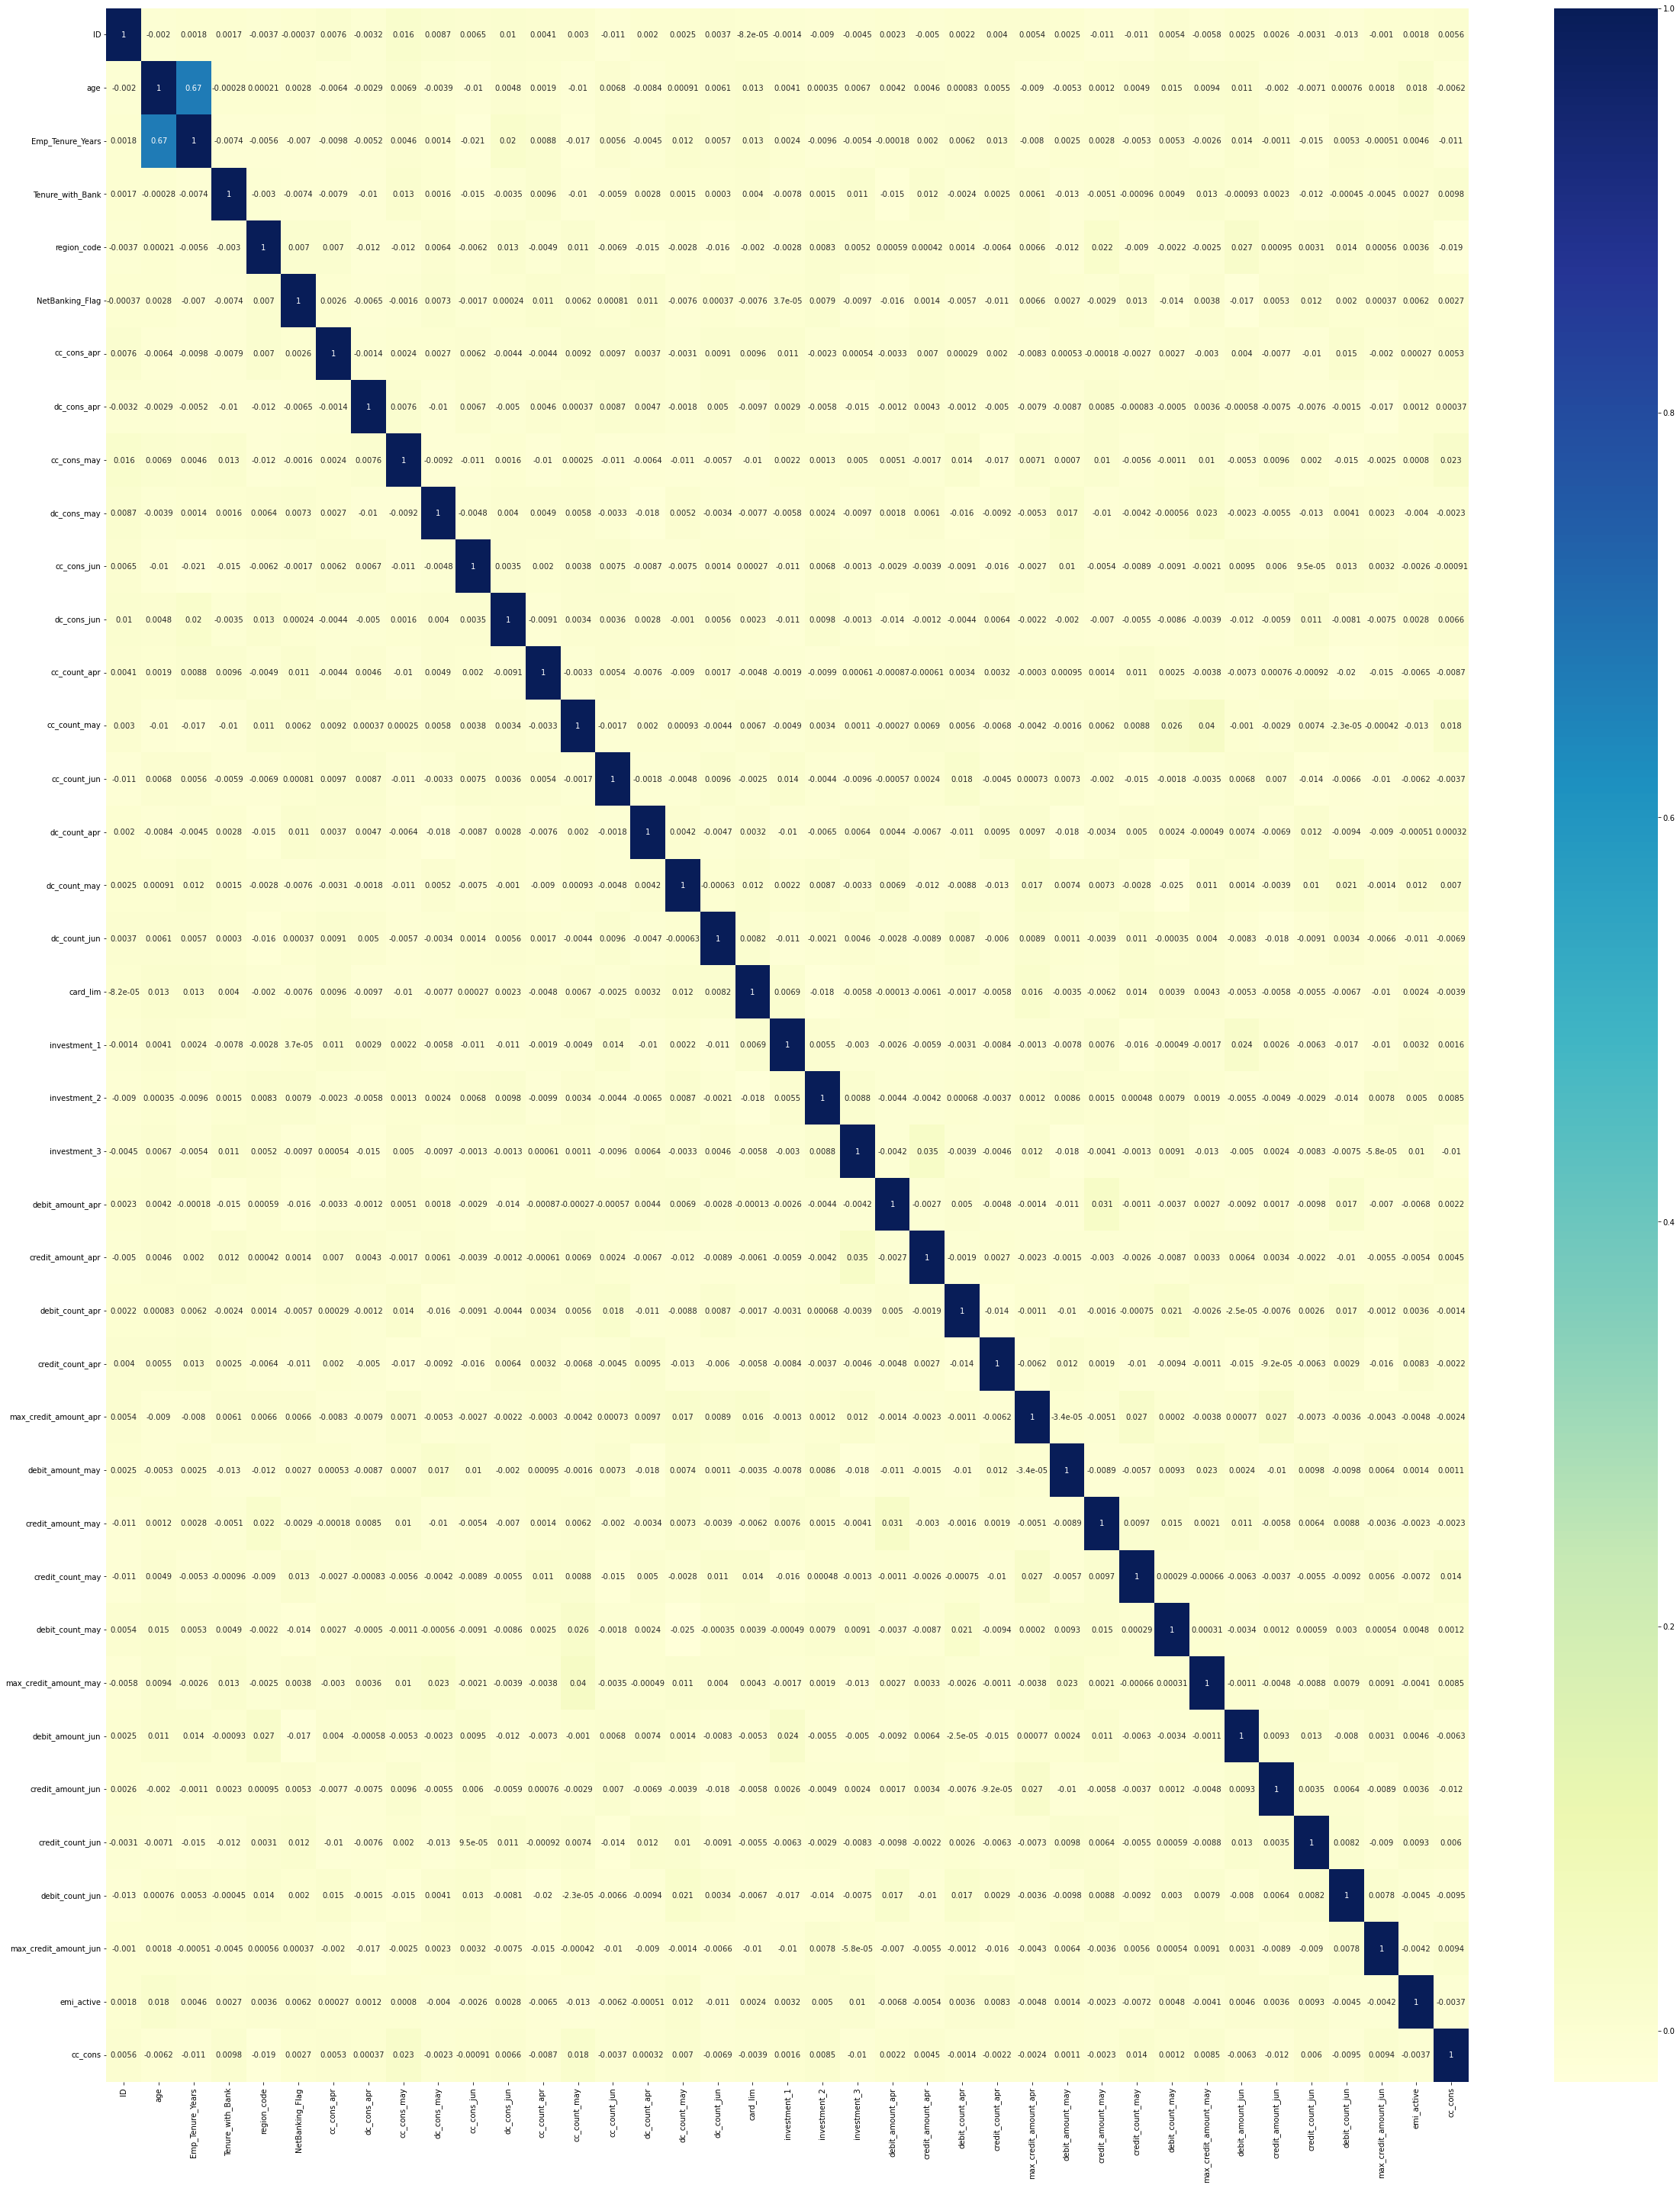

In [62]:
plt.figure(figsize=(40,50))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

####  Insight: Age and tenure years are correlated so dropping Tenure Years . This Implies Multi colinearity so dropping Tenure Years

In [63]:
df_train.drop(columns="Emp_Tenure_Years",inplace=True)

### Some Plot to understand more about the data

#### Analysing Types of Account Type, Gender and Credit Card Consumption

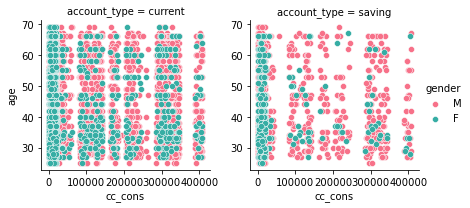

In [64]:
g = sns.FacetGrid(df_train, col="account_type",  hue="gender",palette="husl",sharex=False,sharey=False)
g.map_dataframe(sns.scatterplot, x="cc_cons",y="age")
g.add_legend()
plt.show()


In [65]:
df_train.groupby(["Income","gender"])["ID"].count()

Income  gender
HIGH    F          182
        M          977
LOW     F          593
        M         3435
MEDIUM  F         1208
        M         8068
Name: ID, dtype: int64

### "Income vs CC Consumption"

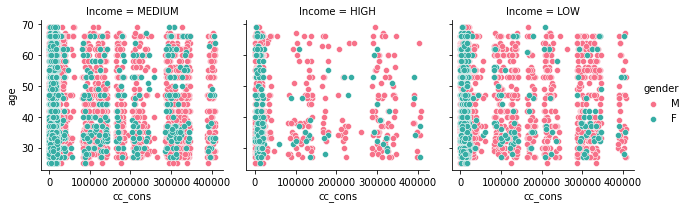

In [66]:

g = sns.FacetGrid(df_train, col="Income",  hue="gender",palette="husl",sharex=False)
g.map_dataframe(sns.scatterplot, x="cc_cons",y="age")
g.add_legend()


plt.show()

### CC Consumption Vs  Income

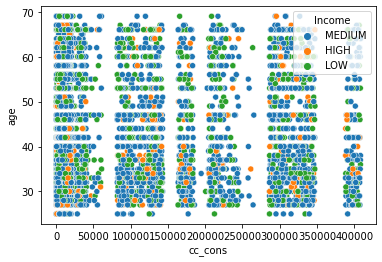

In [67]:
sns.scatterplot(data=df_train,y="age",x="cc_cons",hue="Income")
plt.show()


### Decile Analyis - Value Based Segementing To get some insights about customers so we can segment them

In [68]:
df_decile = df[df.notna()]

In [69]:
df_decile.dropna(inplace=True)

In [70]:
df_decile["Monetary"] = df_train[["cc_cons_apr", "dc_cons_apr",                    
"cc_cons_may",                     
"dc_cons_may",                     
"cc_cons_jun",
"dc_cons_jun"]].sum(axis=1)

In [71]:
df_decile = df_decile[df_decile.age<100]

In [72]:
df_decile["Deciles"]=pd.qcut(df_decile.Monetary,10,labels=False)

In [73]:
df_decile.Deciles.value_counts()

0    1447
7    1446
3    1446
2    1446
8    1446
5    1446
9    1446
1    1446
4    1446
6    1446
Name: Deciles, dtype: int64

#### From above segments we can derive only one insight that is Segment 9 are high spenders while segment 0 is the lowest spenders

#### To understand more we need to do segment profiling

In [74]:
df_decile.groupby("Deciles")["Monetary"].mean()

Deciles
0     22321.937913
1     32194.036062
2     39364.428088
3     46082.576214
4     53111.435363
5     61158.773389
6     71154.789886
7     84725.212092
8    105555.636815
9    177985.374623
Name: Monetary, dtype: float64

### Monetary Vs CC_Cons

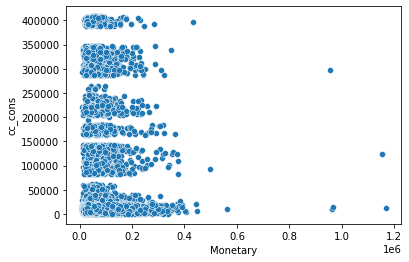

In [75]:
sns.scatterplot(x=df_decile["Monetary"],y=df_decile['cc_cons'])

plt.show()

#### No Significant Patterns

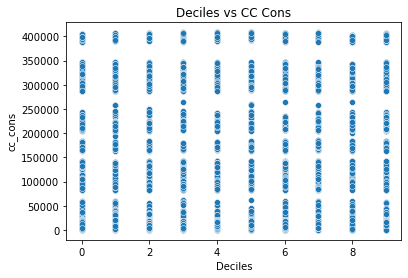

In [76]:
sns.scatterplot(x=df_decile["Deciles"],y=df_decile['cc_cons'])
plt.title("Deciles vs CC Cons")
plt.show()

In [77]:
df_decile["Frequency"] = df_decile[['cc_count_apr',"cc_count_may","cc_count_jun","dc_count_may","dc_count_jun","dc_count_apr"]].sum(axis=1)

In [78]:
df_decile["Recency"] = df_decile["Avg_days_between_transaction"]

In [79]:
col=['Monetary','Recency','Frequency','card_lim','age',"Tenure_with_Bank","investment_1","investment_2","investment_3","investment_4","cc_cons"]

In [80]:
df_decile.groupby(['Deciles']).apply(lambda x : x[col].mean()).T

Deciles,0,1,2,3,4,5,6,7,8,9
Monetary,22321.937913,32194.036062,39364.428088,46082.576214,53111.435363,61158.773389,71154.789886,84725.212092,105555.636815,177985.374623
Recency,11.059433,11.011065,10.738589,10.955048,11.228216,10.924620,11.025588,11.109267,11.116183,11.396266
Frequency,180.195577,174.775934,173.926694,174.544952,180.437068,185.942600,178.403181,175.665284,176.090595,175.843707
card_lim,280406.645473,272430.477870,276665.534578,278800.533195,277070.067773,281149.180498,274359.829184,275468.410788,282300.321577,274371.815353
age,42.728404,42.221300,42.940526,42.862379,42.898340,42.625173,42.688797,42.976487,42.153527,42.604426
Tenure_with_Bank,5.580511,5.553942,5.429461,5.423928,5.497234,5.527663,5.505533,5.556708,5.567082,5.456432
investment_1,517147.707551,510641.078670,640737.959521,639082.810136,634987.195117,780652.810858,678333.123571,542780.244319,728366.105929,527353.815127
investment_2,235289.942916,236737.993935,233908.252905,226341.829087,221157.465996,219778.253921,238732.825180,244398.853562,234337.367006,232330.429260
investment_3,44939.681714,43746.611936,44640.212310,43612.233057,44543.304882,42974.533790,47353.588631,43758.517884,42779.631397,41886.918396
investment_4,3442.111605,3428.650265,3597.443793,3653.341175,3732.468003,3753.298896,3241.119593,3235.513024,3317.013362,3797.762069


**<font color = "Red"> Insights :</font >**

**In the above deciles u can see the monetary segements are not so different compared to cc_consumption**

In [85]:
df_decile["Frequency_quantiles"]=pd.qcut(df_decile.Frequency,5,labels=False)


In [86]:
df_decile.rename(columns={"Frequency_pentiles":"Frequency_quantiles"},inplace=True)

In [87]:
df_decile.groupby("Frequency_quantiles").agg(np.mean)["cc_cons"]

Frequency_quantiles
0    52815.985482
1    56396.214502
2    57069.744718
3    54879.754138
4    54544.040716
Name: cc_cons, dtype: float64

In [88]:
df_decile.groupby(['Frequency_quantiles']).apply(lambda x : x[col].mean()).T

Frequency_quantiles,0,1,2,3,4
Monetary,69232.939487,69296.136203,69694.632748,70204.650252,68373.453619
Recency,11.055652,11.093991,11.143662,11.015517,10.972622
Frequency,71.112686,119.391742,154.763732,194.634483,351.933310
card_lim,273961.937435,278161.754951,277227.863732,275694.357586,281507.502984
age,42.687176,42.517288,42.838732,42.576552,42.738856
Tenure_with_Bank,5.489457,5.502853,5.582746,5.512414,5.462618
investment_1,651811.846394,586804.323743,624937.906320,620028.325789,617462.056574
investment_2,239255.253633,236067.160752,239467.504923,218558.413610,228148.740948
investment_3,43001.205226,42814.791494,42857.130085,48337.064979,43097.788550
investment_4,3523.065659,3299.658491,3477.225748,3595.508088,3712.385973


**<font color = "Green"> Insights :</font >**

**In the above deciles u can see the Frequency segements are not so different compared to cc_consumption**<br>
They have the mean consumption very similar

### Data Preparation

In [89]:
#Seperating numerical columns
#Continuous Variables 


In [90]:
df_train.drop(columns="ID",inplace=True)

In [91]:
numerical_columns=[]
cat_columns=[]
for i in df_train.columns:
    if df_train[i].dtypes in ['float64','int64']:
        numerical_columns.append(i)
    if df_train[i].dtypes in ['object']:
        cat_columns.append(i)
 

In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14463 entries, 111 to 15110
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   account_type           14463 non-null  object 
 1   gender                 14463 non-null  object 
 2   age                    14463 non-null  int64  
 3   Income                 14463 non-null  object 
 4   Tenure_with_Bank       14463 non-null  int64  
 5   region_code            14463 non-null  float64
 6   NetBanking_Flag        14463 non-null  int64  
 7   cc_cons_apr            14463 non-null  float64
 8   dc_cons_apr            14463 non-null  float64
 9   cc_cons_may            14463 non-null  float64
 10  dc_cons_may            14463 non-null  float64
 11  cc_cons_jun            14463 non-null  float64
 12  dc_cons_jun            14463 non-null  float64
 13  cc_count_apr           14463 non-null  float64
 14  cc_count_may           14463 non-null  int64  
 15  

In [93]:
numerical_columns.remove('region_code')


In [94]:
len(numerical_columns)

36

In [95]:
cont_num = [i for i in numerical_columns if df_train[i].nunique()>25]
cat_num =[i for i in numerical_columns if df_train[i].nunique()<25]

In [96]:
len(cont_num)

34

In [97]:
len(cat_num)

2

#### Categorical Features

In [98]:
cat_num.append('region_code')

In [99]:
cat_num

['Tenure_with_Bank', 'NetBanking_Flag', 'region_code']

In [100]:
cat_columns

['account_type', 'gender', 'Income', 'Avg_days_FE']

In [101]:
#Creating summary for numerical columns
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [102]:
df_train[cont_num].apply(var_summary)

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
N,14463.000000,1.446300e+04,1.446300e+04,1.446300e+04,1.446300e+04,1.446300e+04,1.446300e+04,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,14463.000000,1.446300e+04,1.446300e+04,1.446300e+04,1.446300e+04,1.446300e+04,1.446300e+04,14463.000000,14463.000000,1.446300e+04,1.446300e+04,1.446300e+04,14463.000000,14463.000000,1.446300e+04,1.446300e+04,1.446300e+04,14463.000000,14463.000000,1.446300e+04,1.446300e+04,1.446300e+04
NMISS,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
SUM,617116.000000,2.591752e+08,1.174966e+08,2.366596e+08,1.113972e+08,1.759373e+08,1.024862e+08,597985.000000,483735.000000,599557.000000,247542.000000,202938.000000,436795.000000,4.010568e+09,8.965848e+09,3.359817e+09,6.368606e+08,9.840924e+08,1.160556e+09,526852.000000,163528.000000,7.839269e+08,9.449309e+08,1.212015e+09,172244.000000,591454.000000,8.252564e+08,1.105214e+09,1.139841e+09,288478.000000,645111.000000,7.598485e+08,2.295221e+08,7.975370e+08
MEAN,42.668603,1.791988e+04,8.123942e+03,1.636311e+04,7.702222e+03,1.216465e+04,7.086093e+03,41.345848,33.446380,41.454539,17.115536,14.031529,30.200857,2.772985e+05,6.199162e+05,2.323043e+05,4.403378e+04,6.804207e+04,8.024308e+04,36.427574,11.306645,5.420224e+04,6.533436e+04,8.380107e+04,11.909286,40.894282,5.705984e+04,7.641665e+04,7.881084e+04,19.945931,44.604231,5.253740e+04,1.586960e+04,5.514326e+04
MEDIAN,38.000000,1.029641e+04,3.999000e+03,8.697040e+03,3.827000e+03,6.661050e+03,3.314000e+03,10.000000,23.000000,35.000000,7.000000,5.000000,17.000000,2.720000e+05,4.500000e+04,1.110000e+05,1.387300e+04,4.198209e+04,4.704900e+04,32.000000,5.000000,3.191400e+04,3.811600e+04,4.806000e+04,4.000000,23.000000,3.132300e+04,4.588200e+04,4.608000e+04,7.000000,37.000000,3.041900e+04,3.947400e+03,1.338300e+04
STD,12.195665,2.513184e+04,1.454836e+04,2.724213e+04,1.909418e+04,1.862229e+04,1.330802e+04,97.146740,49.638466,46.994162,19.319419,17.139821,29.219454,1.795334e+05,3.086472e+06,4.024316e+05,8.715662e+04,1.125458e+05,1.976009e+05,30.721763,12.686488,1.963766e+05,1.005231e+05,1.800916e+05,16.818754,40.453717,2.019428e+05,1.541908e+05,1.495947e+05,27.215612,35.095819,1.275618e+05,1.197261e+05,9.773400e+04
VAR,148.734242,6.316095e+08,2.116548e+08,7.421336e+08,3.645877e+08,3.467898e+08,1.771034e+08,9437.489010,2463.977331,2208.451242,373.239935,293.773449,853.776484,3.223224e+10,9.526311e+12,1.619512e+11,7.596276e+09,1.266657e+10,3.904610e+10,943.826710,160.946967,3.856378e+10,1.010489e+10,3.243298e+10,282.870487,1636.503205,4.078091e+10,2.377481e+10,2.237858e+10,740.689512,1231.716541,1.627202e+10,1.433434e+10,9.551934e+09
CV,0.285823,1.402456e+00,1.790801e+00,1.664851e+00,2.479048e+00,1.530853e+00,1.878048e+00,2.349613,1.484121,1.133631,1.128765,1.221522,0.967504,6.474373e-01,4.978854e+00,1.732347e+00,1.979313e+00,1.654063e+00,2.462529e+00,0.843366,1.122038,3.623036e+00,1.538595e+00,2.149037e+00,1.412239,0.989227,3.539141e+00,2.017765e+00,1.898149e+00,1.364469,0.786827,2.428019e+00,7.544366e+00,1.772365e+00
MIN,25.000000,2.530000e+02,1.935000e+01,1.570000e+02,2.200000e+01,6.500000e+01,6.200000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,3.000000e-01

## Outlier Treatment

### Using Box Plot to Detect Outliers

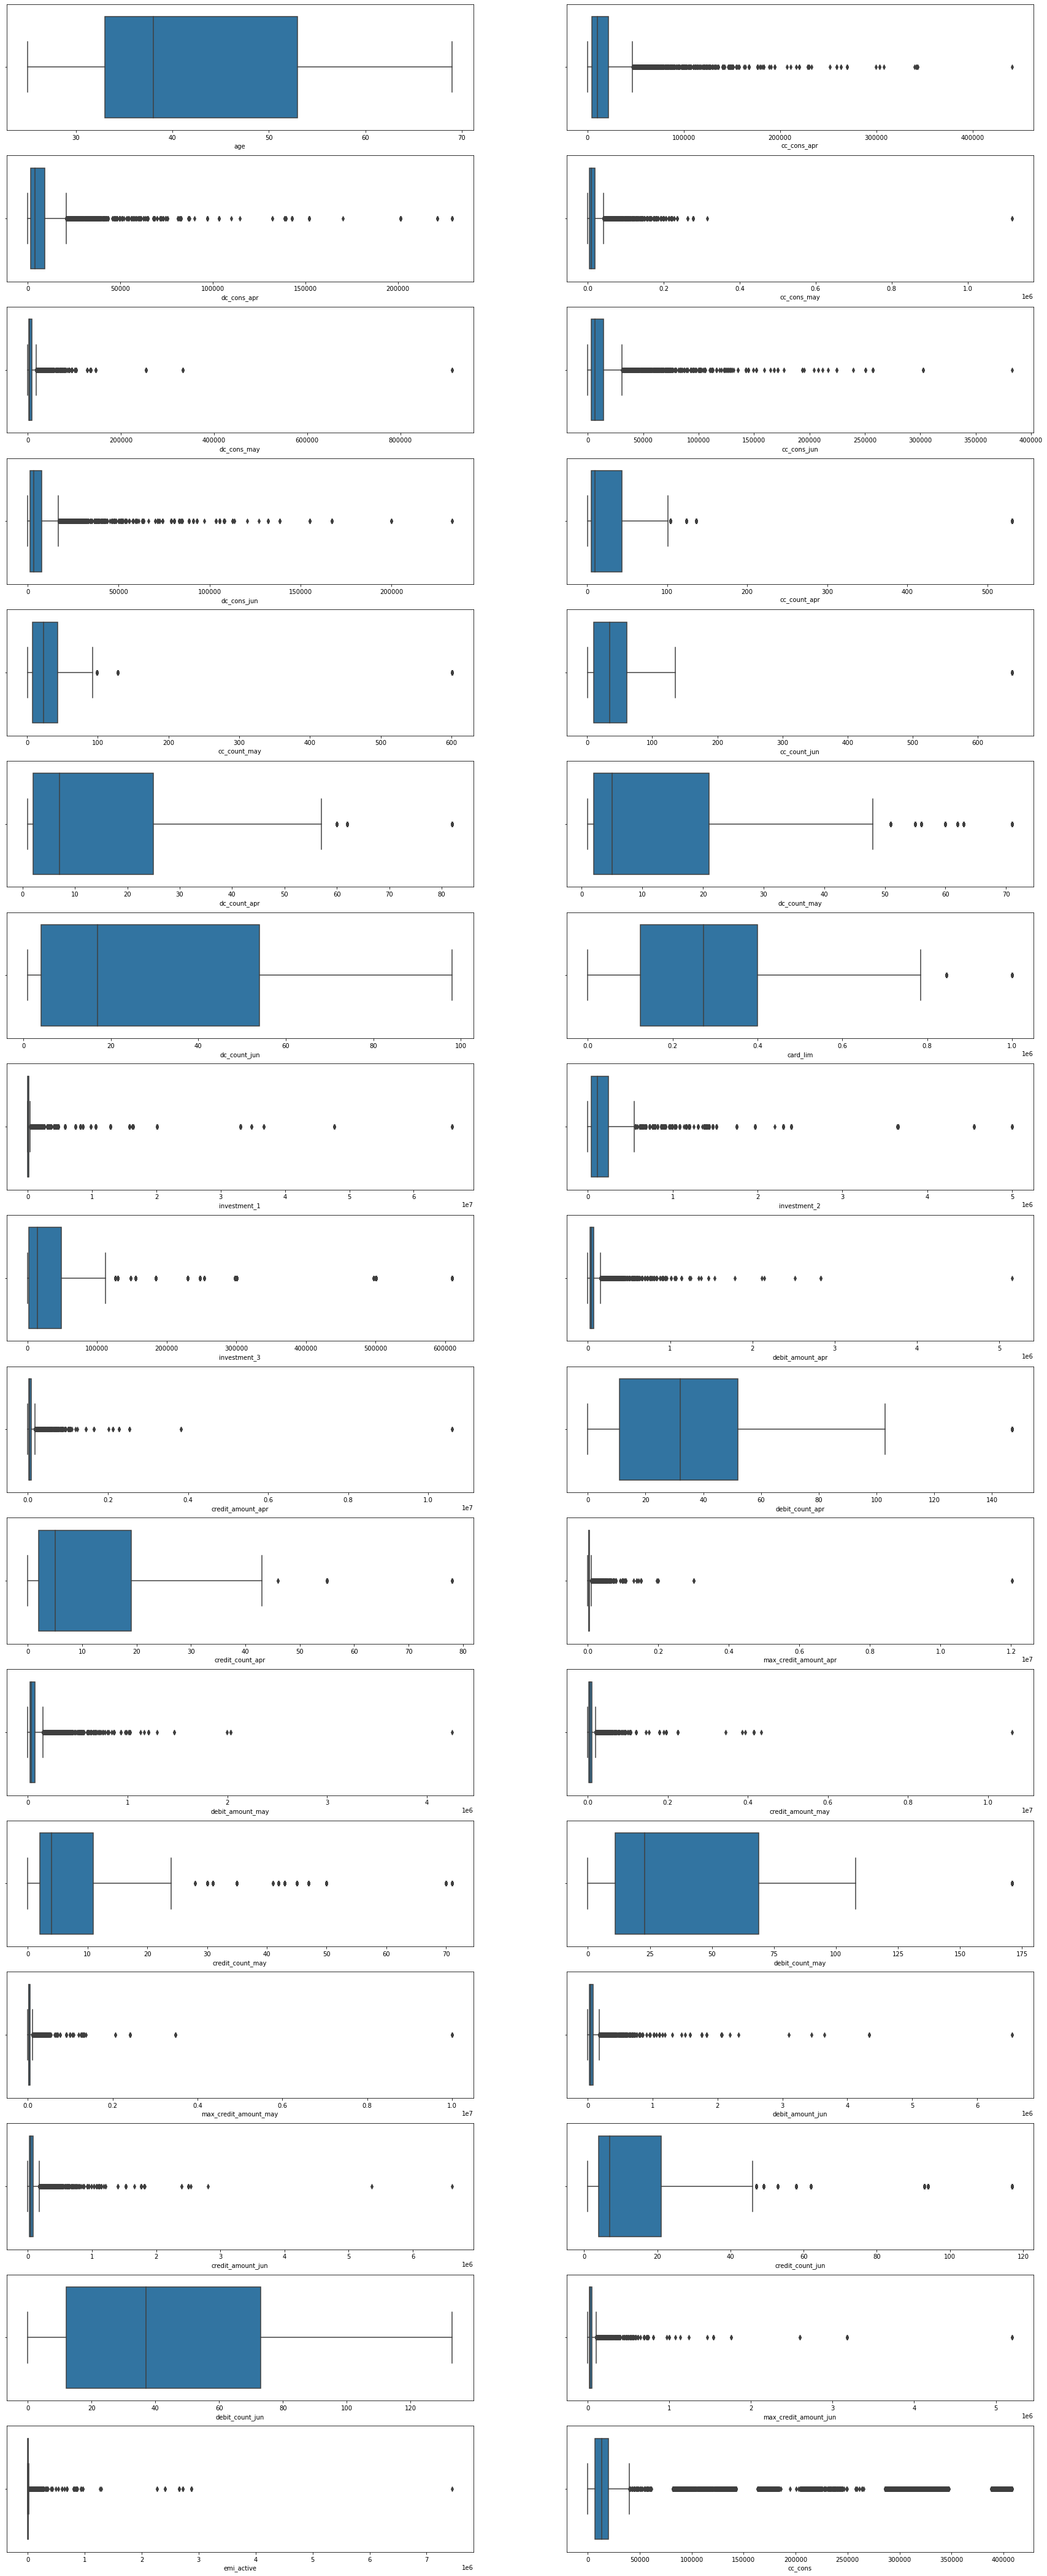

In [103]:
plt.figure(figsize=(30,90))
for i,j in enumerate(cont_num): ## Leaving ID column
    plt.subplot(20,2,i+1)
    sns.boxplot(df_train[j])
    plt.xlabel(j)
    
plt.show()

### Winzorization Technique


In [104]:
#Outlier Cappig
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99),lower=(x.quantile(0.01)))
    return x

#Implementing outlier function 
data_num=df_train[cont_num].apply(outlier_capping)

In [105]:
data_num.shape

(14463, 34)

In [106]:
df_train.shape

(14463, 41)

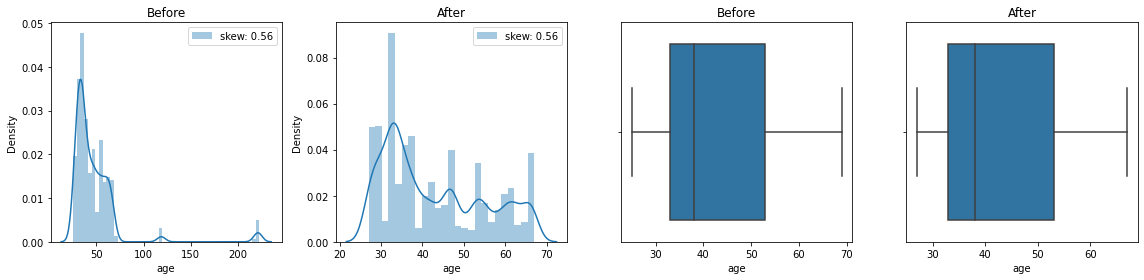

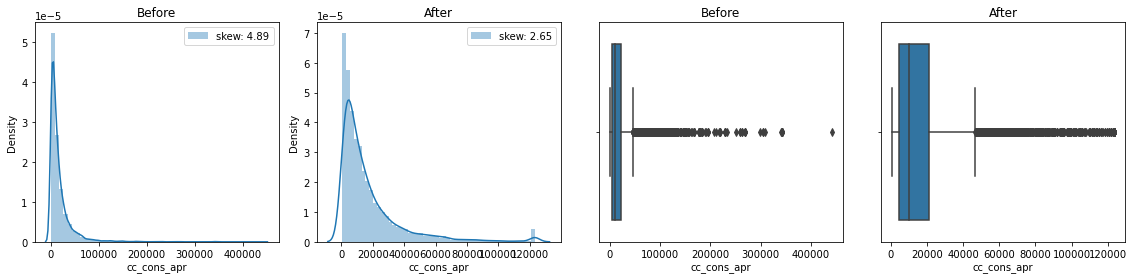

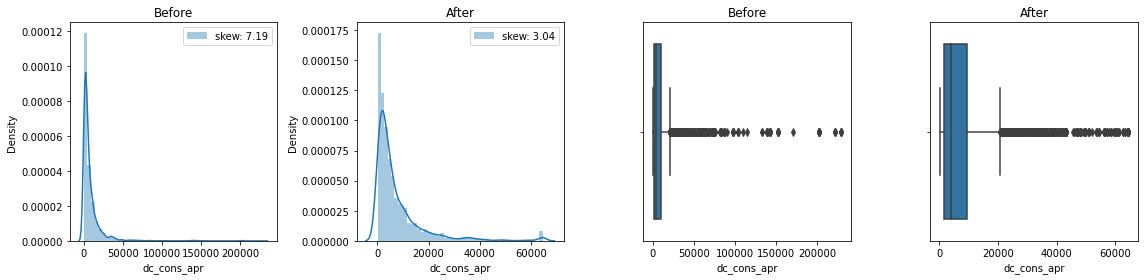

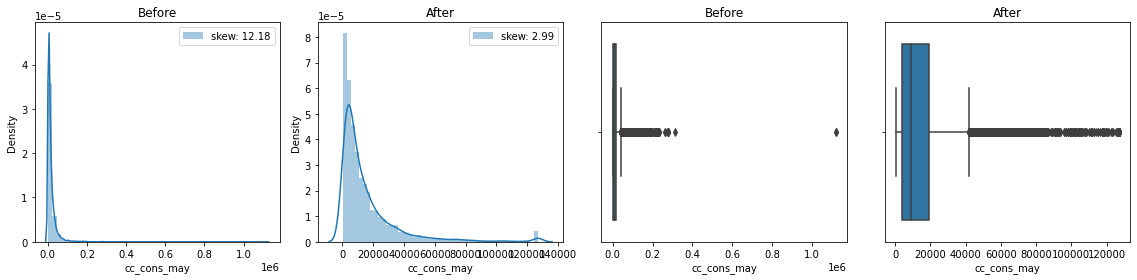

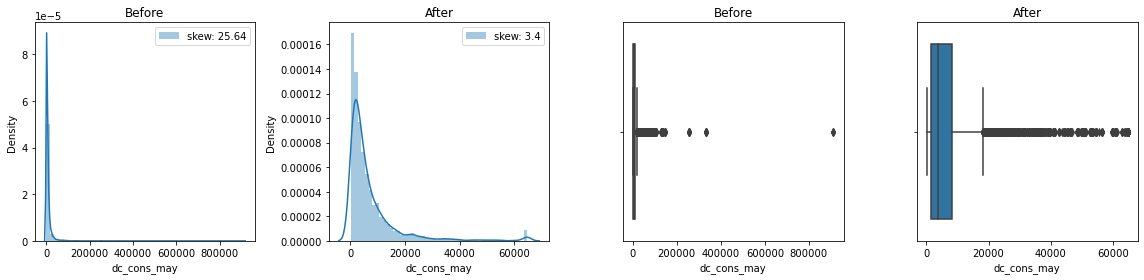

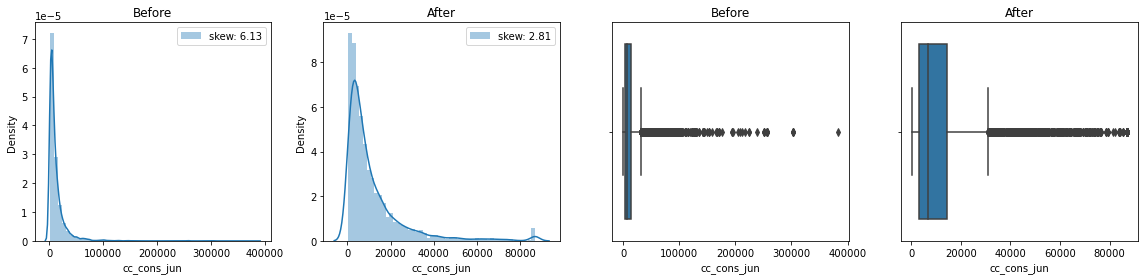

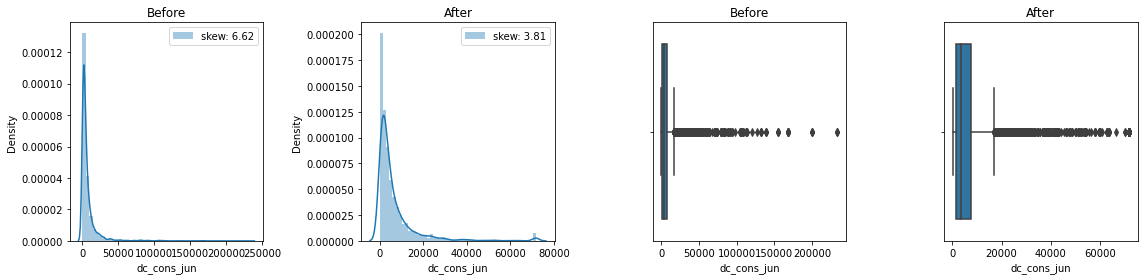

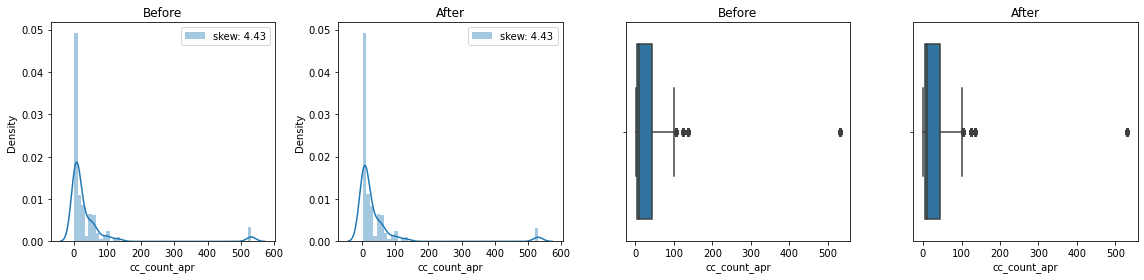

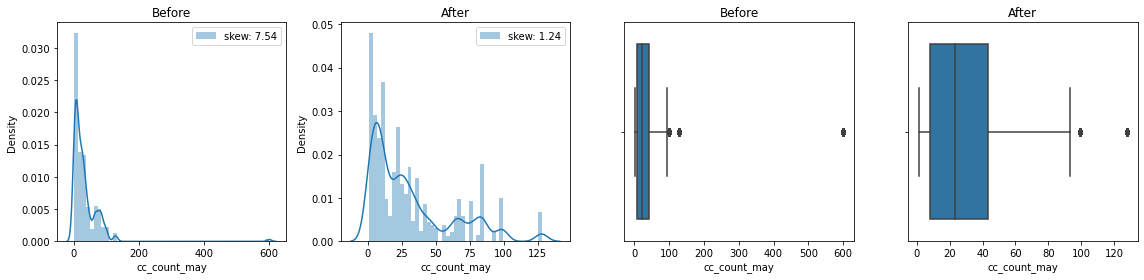

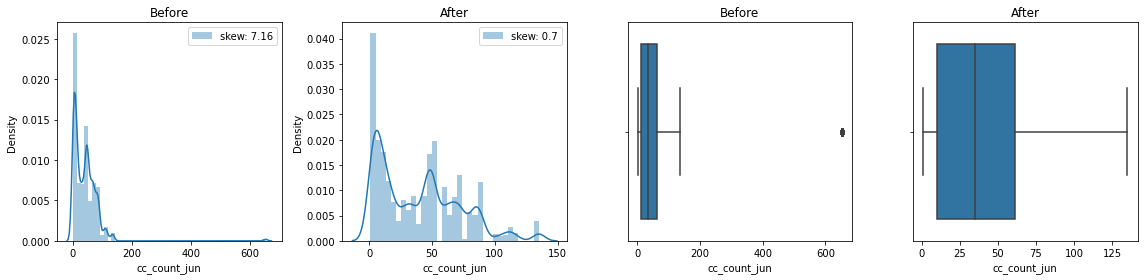

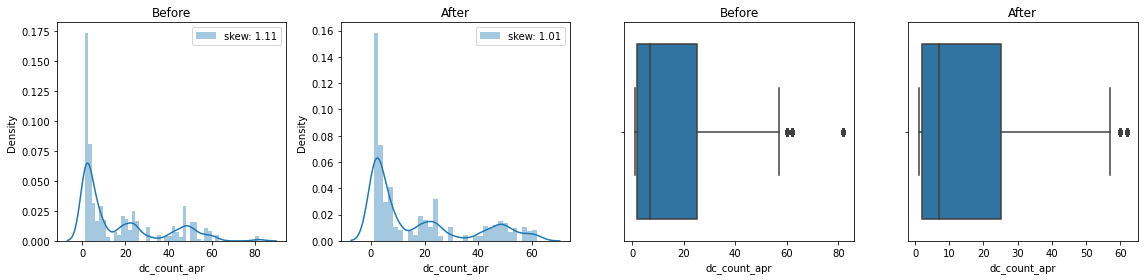

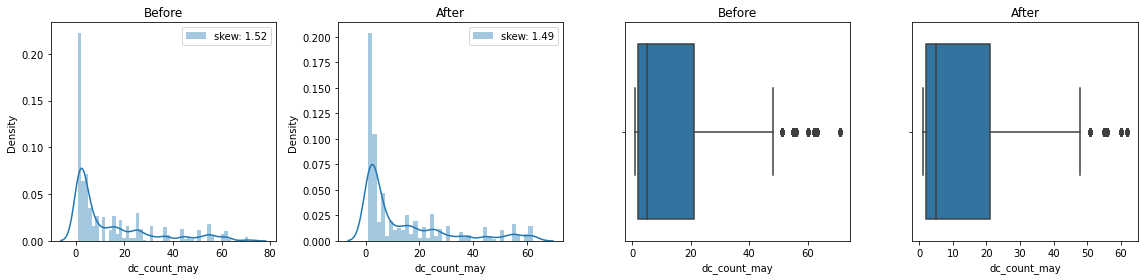

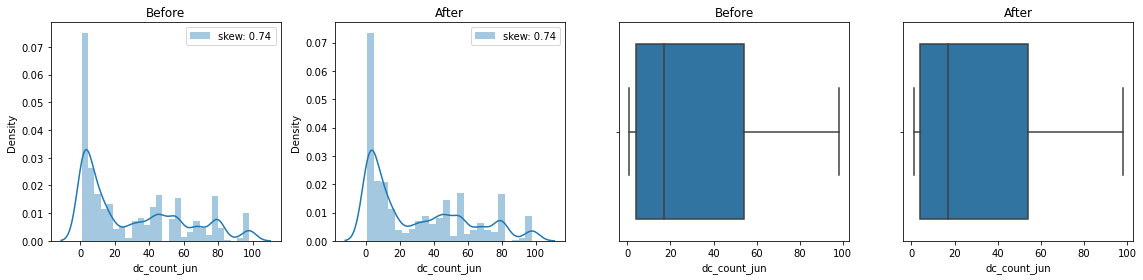

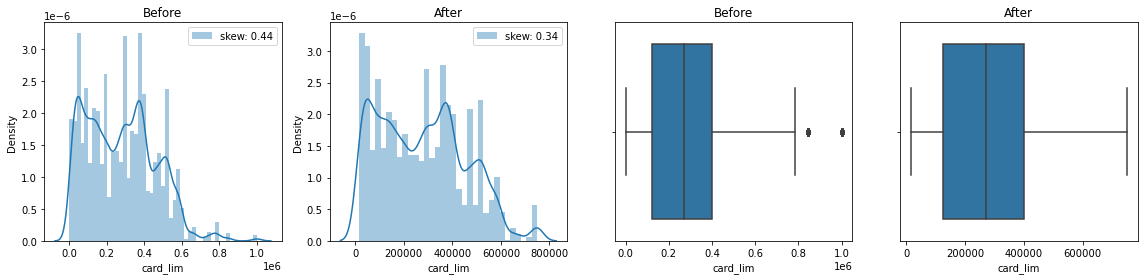

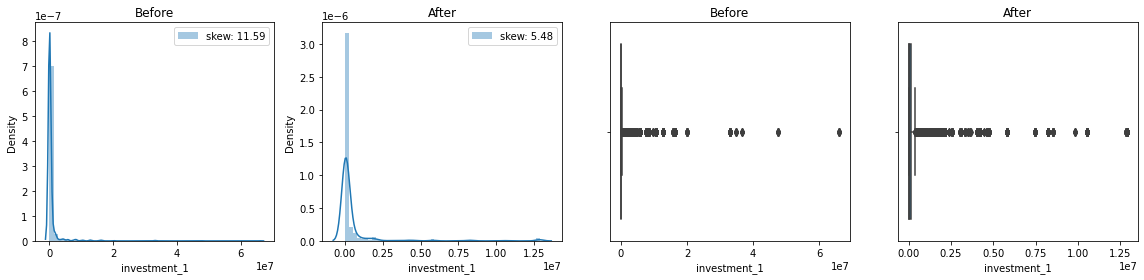

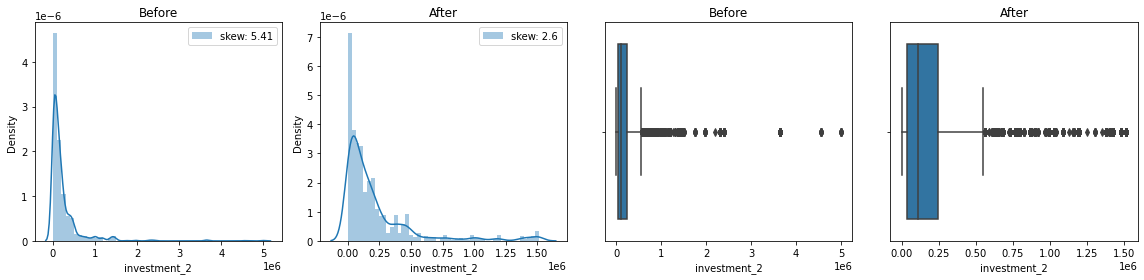

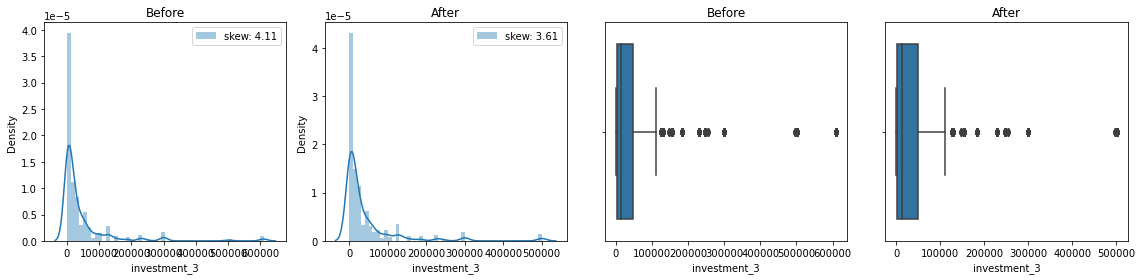

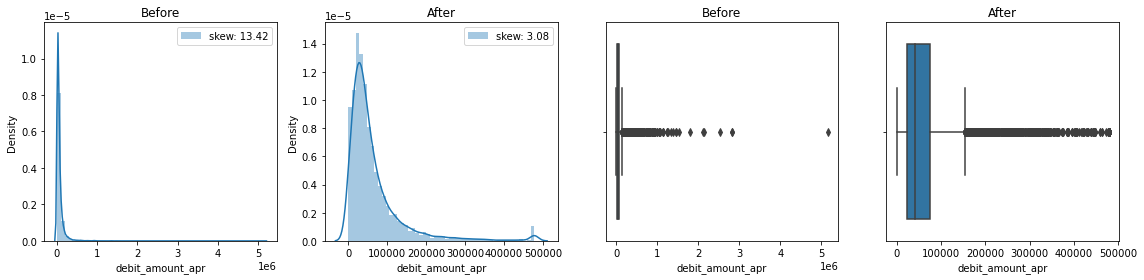

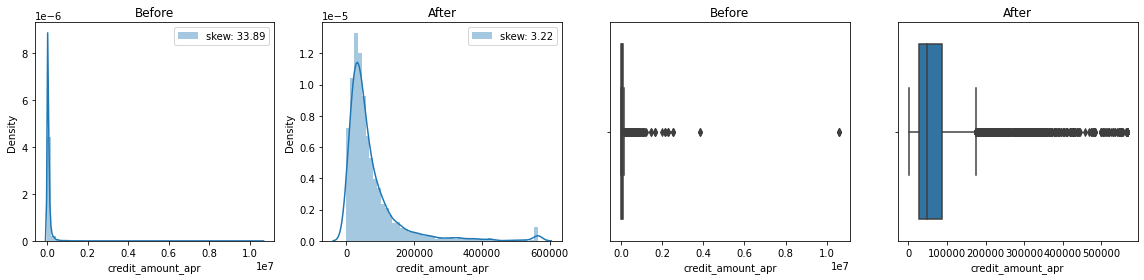

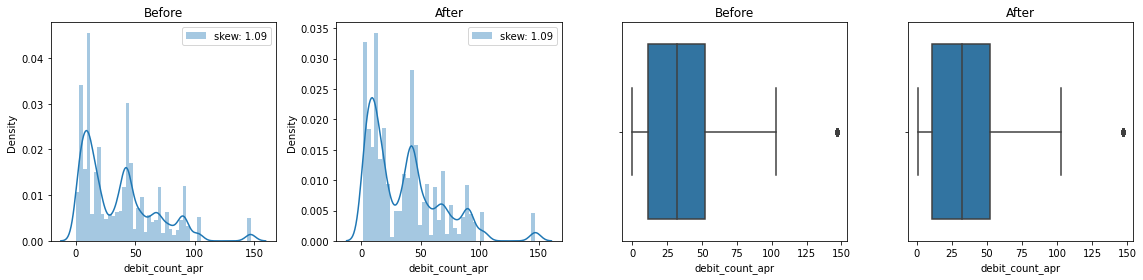

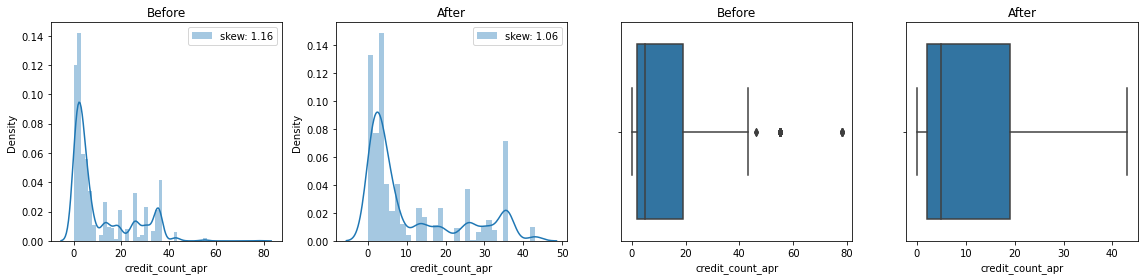

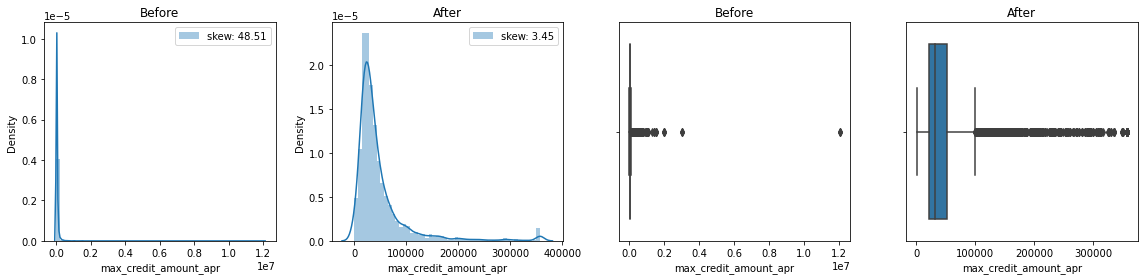

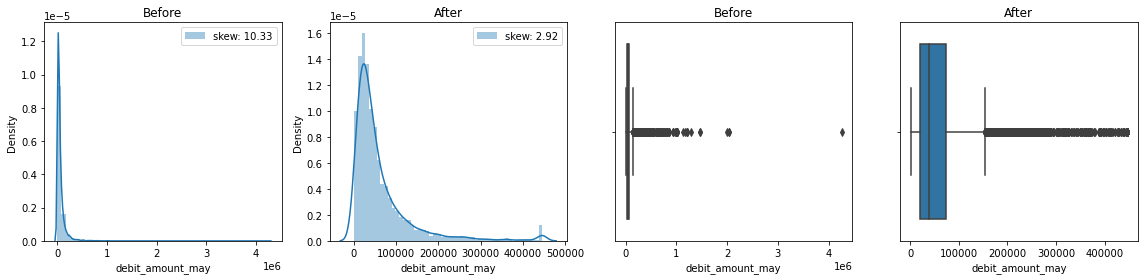

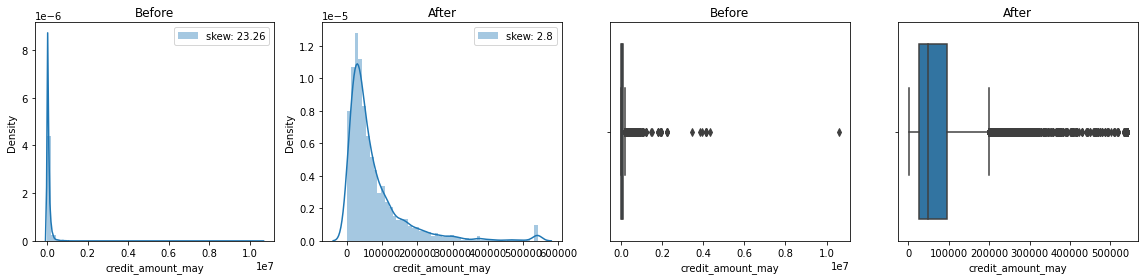

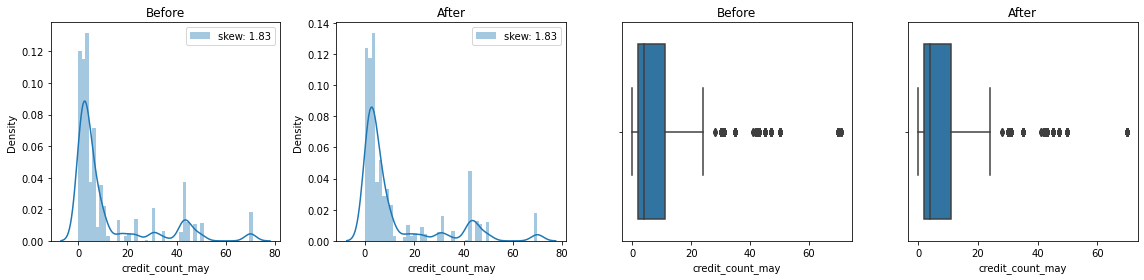

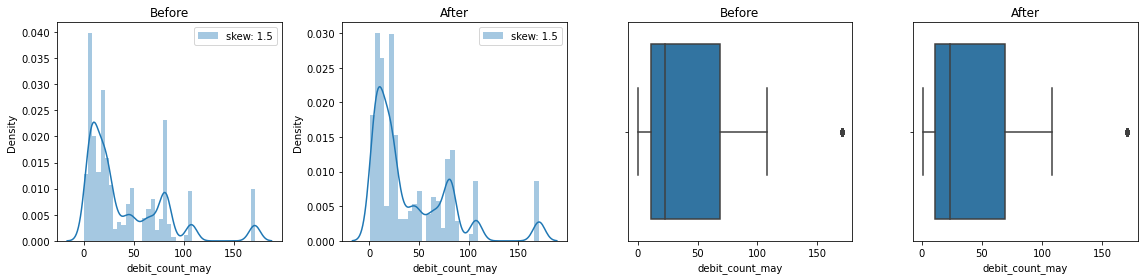

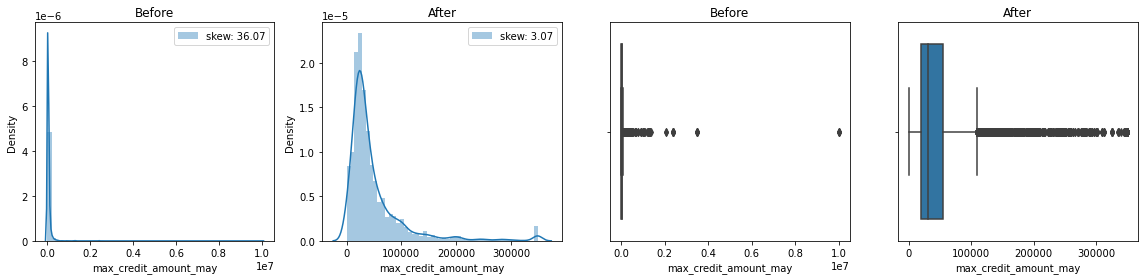

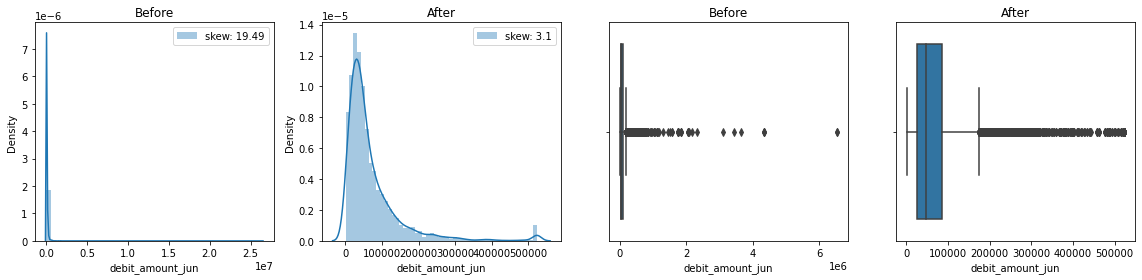

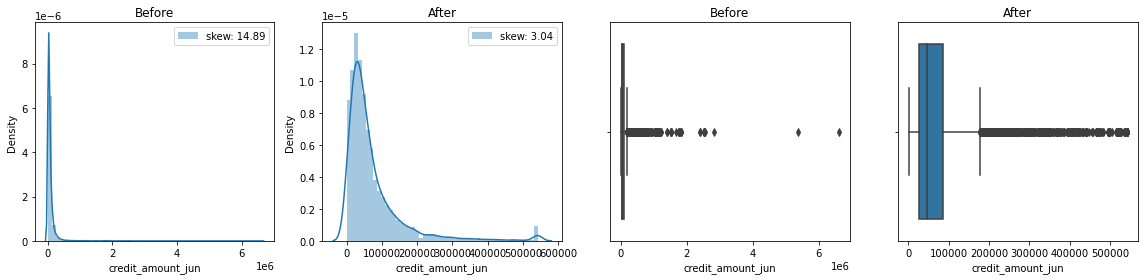

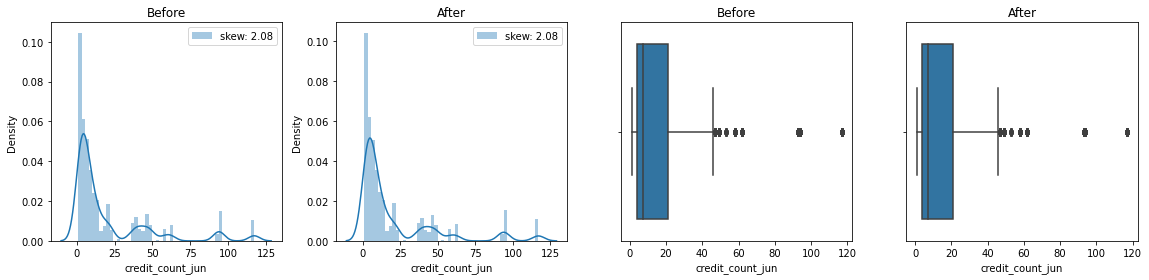

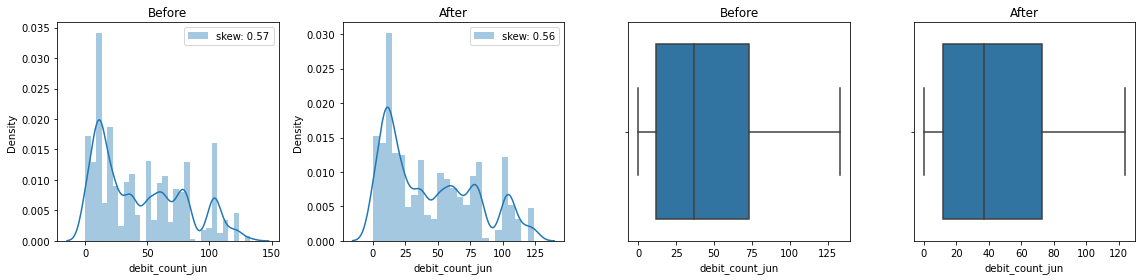

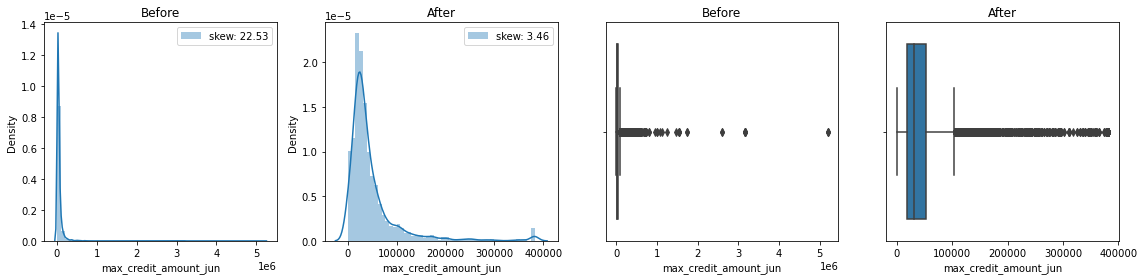

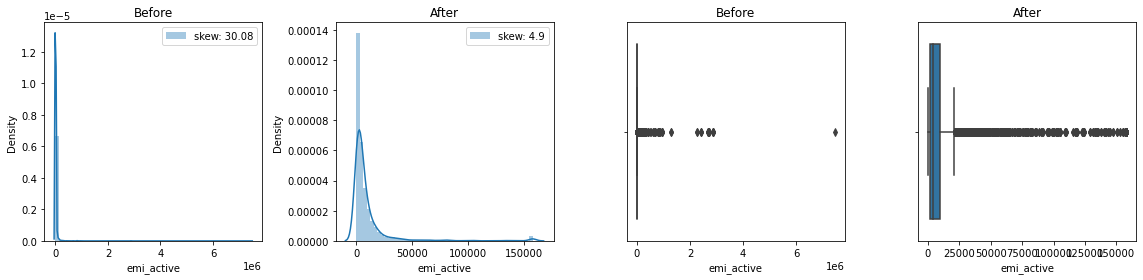

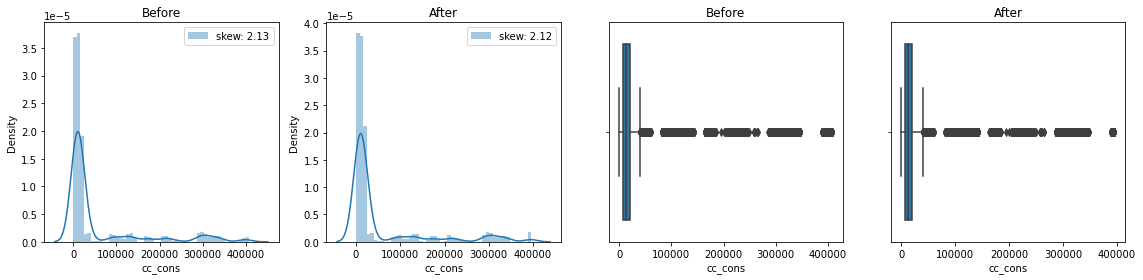

In [107]:
for col in cont_num :
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(data_num[col], label="skew: " + str(np.round(data_num[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df_train[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(data_num[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

### We can still see some outliers 

## Trying IQR treatment

In [ ]:



Q1 = df_train[numerical_columns].quantile(0.25)
Q3 = df_train[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

df_num_iqr = df_train[~((df_train< (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_num_iqr.shape

In [ ]:
df_num_iqr = df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df_num_iqr.shape 

In [ ]:
df_train.shape

#### We are loosing lot of data after outlier treatment so I am using Winozorization Technique 

### Categorical Variable Treatments

In [108]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

#df_cat = create_dummies(df_cat,"gender")
#df_cat = create_dummies(df_cat,"account_type")

In [109]:
df_cat = df_train[cat_columns + cat_num]

In [110]:
df_cat.drop(columns='region_code',inplace=True) ## So many categories

In [111]:
df_cat.head()

,account_type,gender,Income,Avg_days_FE,Tenure_with_Bank,NetBanking_Flag
111,current,M,MEDIUM,10+ days,1,0
112,current,M,HIGH,10+ days,6,0
113,current,M,MEDIUM,<5 days,1,1
114,current,F,MEDIUM,<5 days,6,1
115,current,M,MEDIUM,5-10,4,1


#### Applying Nominal encoding

In [112]:
df_cat = create_dummies(df_cat,"gender")
df_cat = create_dummies(df_cat,"account_type")

In [113]:
df_cat.head()

,Income,Avg_days_FE,Tenure_with_Bank,NetBanking_Flag,gender_M,account_type_saving
111,MEDIUM,10+ days,1,0,1,0
112,HIGH,10+ days,6,0,1,0
113,MEDIUM,<5 days,1,1,1,0
114,MEDIUM,<5 days,6,1,0,0
115,MEDIUM,5-10,4,1,1,0


#### Ordinal encoding for Avg_days and Income

In [114]:
import category_encoders as ce


encoder= ce.OrdinalEncoder(cols=['Income'],return_df=True,
                           mapping=[{'col':'Income',
'mapping':{'LOW':1,'MEDIUM':2,'HIGH':3}}])

df_cat['transformed_Income'] = encoder.fit_transform(df_cat["Income"])


In [115]:
df_cat[["transformed_Income"]].sample(10)

,transformed_Income
8511,1
13028,2
6805,2
10617,1
15000,2
11410,2
14101,2
9681,2
3100,1
4874,1


In [116]:
df_cat.drop(columns=["Income"],inplace=True)

In [117]:
encoder= ce.OrdinalEncoder(cols=['Avg_days_FE'],return_df=True,
                           mapping=[{'col':'Avg_days_FE',
'mapping':{'<5 days':1,'10+ days':3,'5-10':2}}])

df_cat['transformed_Days_bet_transaction'] = encoder.fit_transform(df_cat["Avg_days_FE"])


In [119]:
df_cat[["Avg_days_FE","transformed_Days_bet_transaction"]].sample(10)

,Avg_days_FE,transformed_Days_bet_transaction
5985,5-10,2
1104,10+ days,3
6833,10+ days,3
12276,10+ days,3
8242,10+ days,3
3342,10+ days,3
3646,10+ days,3
4810,5-10,2
8533,10+ days,3
12117,10+ days,3


In [120]:
df_cat.drop(columns='Avg_days_FE',inplace=True)

In [121]:
df_cat.sample(5)

,Tenure_with_Bank,NetBanking_Flag,gender_M,account_type_saving,transformed_Income,transformed_Days_bet_transaction
13522,3,0,1,0,2,3
9409,4,1,0,0,3,3
2092,3,1,0,1,2,3
1699,7,1,1,0,3,1
14758,7,1,1,0,1,3


In [122]:
df_final = pd.concat([df_cat,data_num],axis=1)

In [123]:
df_final.head()

,Tenure_with_Bank,NetBanking_Flag,gender_M,account_type_saving,transformed_Income,transformed_Days_bet_transaction,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
111,1,0,1,0,2,3,35.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47,430000.0,593.20,1244.14,787.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2,65.0,50836.0,1674.09,20014.0
112,6,0,1,0,3,3,35.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31,127500.0,213557.15,172678.56,90525.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21,63.0,23226.0,13043.34,10173.0
113,1,1,1,0,2,1,55.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80,199999.0,165907.57,470000.00,25524.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7,1.0,27036.0,25375.27,16095.0
114,6,1,0,0,2,1,29.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10,155000.0,81872.65,223379.40,48500.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21,83.0,43037.0,3544.33,7707.0
115,4,1,1,0,2,2,34.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68,297000.0,568.80,385000.00,183999.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8,32.0,32044.0,12780.44,96408.0


## Feature Selection

###  We Know that Target Variable is Skewed 

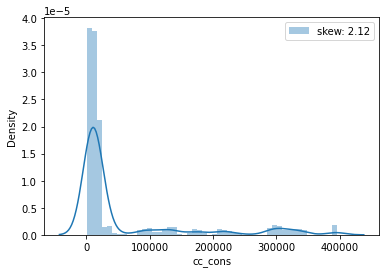

In [124]:
sns.distplot(df_final.cc_cons, label="skew: " + str(np.round(df_final.cc_cons.skew(),2)))
plt.legend()
plt.show()



### Applying Log Tranformation

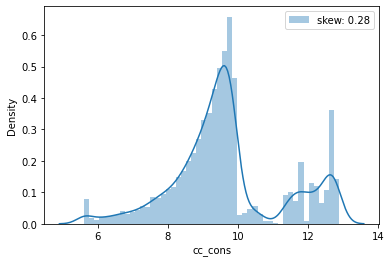

In [125]:
sns.distplot(np.log(df_final.cc_cons), label="skew: " + str(np.round(np.log(df_final.cc_cons).skew(),2)))
plt.legend()
plt.show()


#### the bump on the right we see is due to outlier capping

In [126]:
df_final1 = df_final.copy()#copying the dataset

In [127]:
df_final1.head()

,Tenure_with_Bank,NetBanking_Flag,gender_M,account_type_saving,transformed_Income,transformed_Days_bet_transaction,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
111,1,0,1,0,2,3,35.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47,430000.0,593.20,1244.14,787.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2,65.0,50836.0,1674.09,20014.0
112,6,0,1,0,3,3,35.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31,127500.0,213557.15,172678.56,90525.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21,63.0,23226.0,13043.34,10173.0
113,1,1,1,0,2,1,55.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80,199999.0,165907.57,470000.00,25524.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7,1.0,27036.0,25375.27,16095.0
114,6,1,0,0,2,1,29.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10,155000.0,81872.65,223379.40,48500.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21,83.0,43037.0,3544.33,7707.0
115,4,1,1,0,2,2,34.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68,297000.0,568.80,385000.00,183999.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8,32.0,32044.0,12780.44,96408.0


In [128]:
df_final1["log_cc_cons"] = np.log(df_final["cc_cons"])

In [129]:
df_final1.drop(columns=['cc_cons'],inplace=True)

In [130]:
features = df_final1[df_final1.columns.difference( ['log_cc_cons'] )]
target = df_final1['log_cc_cons']

In [131]:
features.head()

,NetBanking_Flag,Tenure_with_Bank,account_type_saving,age,card_lim,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,dc_cons_apr,dc_cons_jun,dc_cons_may,dc_count_apr,dc_count_jun,dc_count_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,gender_M,investment_1,investment_2,investment_3,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,transformed_Days_bet_transaction,transformed_Income
111,0,1,0,35.0,430000.0,24893.00,16291.40,10288.00,2.0,10.0,26.0,25192.00,12761.0,191777.13,6.0,2,2.0,378.00,11432.00,29664.00,48.0,47,14.0,85919.48,30051.32,11527.50,24.0,65.0,40.0,1674.09,1,593.20,1244.14,787.0,25296.0,50836.0,24563.0,3,2
112,0,6,0,35.0,127500.0,18941.62,4217.00,20672.00,1.0,13.0,7.0,88693.37,76206.0,71162.00,36.0,21,2.0,966.00,885.00,287.00,3.0,31,21.0,12255.75,42119.05,92276.57,35.0,63.0,78.0,13043.34,1,213557.15,172678.56,90525.0,80750.0,23226.0,23948.0,3,3
113,1,1,0,55.0,199999.0,5678.87,23956.25,1964.50,43.0,102.0,32.0,84880.00,75283.0,70978.00,9.0,7,2.0,2724.00,5168.00,3933.11,4.0,80,1.0,34193.00,58373.25,19343.00,72.0,1.0,82.0,25375.27,1,165907.57,470000.00,25524.0,38466.0,27036.0,10752.0,1,2
114,1,6,0,29.0,155000.0,30489.50,17521.00,12609.88,53.0,50.0,1.0,236326.00,68708.0,63033.84,30.0,21,23.0,1236.00,13650.30,9138.14,1.0,10,1.0,11558.23,69851.51,43867.91,43.0,83.0,38.0,3544.33,0,81872.65,223379.40,48500.0,52732.0,43037.0,12607.0,1,2
115,1,4,0,34.0,297000.0,7441.40,2121.00,4364.00,67.0,82.0,47.0,58897.03,80140.0,30286.00,36.0,8,24.0,6906.04,6829.18,1939.00,54.0,68,16.0,17022.81,10071.00,153253.71,46.0,32.0,50.0,12780.44,1,568.80,385000.00,183999.0,19613.0,32044.0,25213.0,2,2


#### Feature Selection Using RFE

In [132]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#import itertools

#Checking RFE 

lm = LinearRegression()
#create the RFE model and select 30 attributes
rfe = RFE(lm, n_features_to_select=20) #### Build with 20 Features 
rfe = rfe.fit(features, target)

In [133]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [134]:
RFE_features=features.columns[rfe.get_support()]
features1 = features[RFE_features]

In [135]:
fc =features1.columns.tolist()

In [136]:
fc

['NetBanking_Flag',
 'Tenure_with_Bank',
 'account_type_saving',
 'age',
 'cc_cons_may',
 'cc_count_apr',
 'cc_count_jun',
 'cc_count_may',
 'credit_count_apr',
 'credit_count_jun',
 'credit_count_may',
 'dc_count_apr',
 'dc_count_jun',
 'dc_count_may',
 'debit_count_apr',
 'debit_count_jun',
 'debit_count_may',
 'gender_M',
 'transformed_Days_bet_transaction',
 'transformed_Income']

#### Performing F regression

In [137]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features1, target )

In [138]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features1.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [139]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(20)

In [140]:
f_reg_results

,Variable,F_Value,P_Value
4,cc_cons_may,8.730013,0.003
7,cc_count_may,4.140303,0.042
5,cc_count_apr,3.219494,0.073
14,debit_count_apr,1.778837,0.182
3,age,1.206172,0.272
9,credit_count_jun,0.843418,0.358
2,account_type_saving,0.520930,0.470
10,credit_count_may,0.264442,0.607
1,Tenure_with_Bank,0.233103,0.629
12,dc_count_jun,0.212988,0.644


Only **cc_cons_may and cc_count_may** has p value is less than 0.05  

#### Trying RFE CV Technique

In [141]:
from sklearn.feature_selection import RFECV

In [142]:
from sklearn.tree import DecisionTreeRegressor

dtree=DecisionTreeRegressor()

rfecv =RFECV(estimator=dtree,step=1,scoring='neg_mean_squared_error',cv=4,verbose=1,n_jobs=-1)

In [143]:
rfecv.fit(features,target)

Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 fe

RFECV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [144]:
#rfecv.transform(features)

In [145]:
print(rfecv)

RFECV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)


In [146]:
rfecv.n_features_ ## I am ending with Only One Feature 

1

In [147]:
features.columns[rfecv.support_]

Index(['max_credit_amount_jun'], dtype='object')

###  Model Building 

In [148]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [149]:
df_final1.head()

,Tenure_with_Bank,NetBanking_Flag,gender_M,account_type_saving,transformed_Income,transformed_Days_bet_transaction,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,log_cc_cons
111,1,0,1,0,2,3,35.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47,430000.0,593.20,1244.14,787.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2,65.0,50836.0,1674.09,9.904187
112,6,0,1,0,3,3,35.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31,127500.0,213557.15,172678.56,90525.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21,63.0,23226.0,13043.34,9.227492
113,1,1,1,0,2,1,55.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80,199999.0,165907.57,470000.00,25524.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7,1.0,27036.0,25375.27,9.686264
114,6,1,0,0,2,1,29.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10,155000.0,81872.65,223379.40,48500.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21,83.0,43037.0,3544.33,8.949884
115,4,1,1,0,2,2,34.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68,297000.0,568.80,385000.00,183999.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8,32.0,32044.0,12780.44,11.476344


### Statistical Model 

In [182]:
#import sklearn.metrics

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [164]:
features.head(1)

,NetBanking_Flag,Tenure_with_Bank,account_type_saving,age,card_lim,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,credit_amount_may,credit_count_apr,credit_count_jun,credit_count_may,dc_cons_apr,dc_cons_jun,dc_cons_may,dc_count_apr,dc_count_jun,dc_count_may,debit_amount_apr,debit_amount_jun,debit_amount_may,debit_count_apr,debit_count_jun,debit_count_may,emi_active,gender_M,investment_1,investment_2,investment_3,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,transformed_Days_bet_transaction,transformed_Income
111,0,1,0,35.0,430000.0,24893.0,16291.4,10288.0,2.0,10.0,26.0,25192.0,12761.0,191777.13,6.0,2,2.0,378.0,11432.0,29664.0,48.0,47,14.0,85919.48,30051.32,11527.5,24.0,65.0,40.0,1674.09,1,593.2,1244.14,787.0,25296.0,50836.0,24563.0,3,2


In [151]:
X = features[fc]

y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)

print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (10847, 20)
The shape of X_test is: (3616, 20)
The shape of y_train is: (10847,)
The shape of y_test is: (3616,)


In [152]:
#Splitting data into training and testing data sets
#train_reg, test_reg = train_test_split(df_final1[fc+["log_cc_cons"]], test_size = 0.3)

In [154]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 10847 entries, 3596 to 13954
Series name: log_cc_cons
Non-Null Count  Dtype  
--------------  -----  
10847 non-null  float64
dtypes: float64(1)
memory usage: 169.5 KB


In [155]:
linreg_full_model_withlog = sm.OLS(y_train, X_train).fit()


print(linreg_full_model_withlog.summary())
 

                                 OLS Regression Results                                
Dep. Variable:            log_cc_cons   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          1.225e+04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):                        0.00
Time:                        10:31:26   Log-Likelihood:                         -22981.
No. Observations:               10847   AIC:                                  4.600e+04
Df Residuals:                   10827   BIC:                                  4.615e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [156]:
train_pred =np.exp(linreg_full_model_withlog.predict(X_train))
test_pred =np.exp(linreg_full_model_withlog.predict(X_test))
train_credit_consumption = np.exp(y_train)
test_credit_consumption= np.exp(y_test)

In [183]:
#MAPE for training and testing data sets                           

print("MAPE for Training and testing data sets:")
LR_MAPE_train = np.mean(np.abs(train_credit_consumption- train_pred)/train_credit_consumption)
print(LR_MAPE_train)
LR_MAPE_test = np.mean(np.abs(test_credit_consumption - test_pred)/test_credit_consumption)
print(LR_MAPE_test)


#MSE for training and testing data sets                           

print("\nMSE for Training and testing data sets:")
LR_MSE_train= mean_squared_error(train_credit_consumption,train_pred)
print(LR_MSE_train)
LR_MSE_test = mean_squared_error(test_credit_consumption,test_pred)
print(LR_MSE_test)

#RMSE for training and testing data sets                           


print("\nRMSE for Training and testing data sets:")
LR_RMSE_train = np.sqrt(mean_squared_error(train_credit_consumption,train_pred))
print(LR_RMSE_train)
LR_RMSE_test = np.sqrt(mean_squared_error(test_credit_consumption,test_pred))
print(LR_RMSE_test)


print("\n#RMSPE for training and testing data sets")

LR_rmspe_train = (np.sqrt(np.mean(np.square((train_credit_consumption - train_pred) / train_credit_consumption)))) * 100
print(LR_rmspe_train)

LR_rmspe_test = (np.sqrt(np.mean(np.square((test_credit_consumption - test_pred) / test_credit_consumption)))) * 100
print(LR_rmspe_test)


#sklearn.metrics.r2_score



print("\n Rsquare score")

LR_r2 = r2_score(test_credit_consumption,test_pred)
print(LR_r2)

MAPE for Training and testing data sets:
5.3291633557619855
5.2317909591079035

MSE for Training and testing data sets:
12552479215.698904
11993854971.965734

RMSE for Training and testing data sets:
112037.8472468072
109516.45982210041

#RMSPE for training and testing data sets
2782.081482200646
2165.835876165777

 Rsquare score
-0.26409140014589805


#### Residuals following Normal distribution. This is one of the Assumption in Linear Regression.

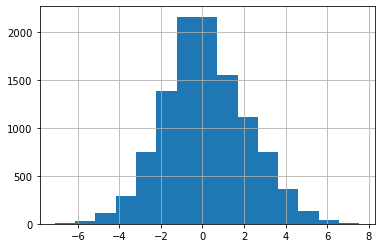

In [184]:
#Checking Errors distribution
linreg_full_model_withlog.resid.hist(bins=15)
plt.show()
#model_reg.resid.to_csv("Residual.csv")


### Decile Analysis

In [185]:
train_data=pd.DataFrame()
test_data=pd.DataFrame()

In [189]:
train_data["pred"]=train_pred
test_data['pred']=test_pred

train_data["Credit_Consumption"] = train_credit_consumption
test_data["Credit_Consumption"] = test_credit_consumption


In [190]:
train_data['Deciles']=pd.qcut(train_data['pred'],10, labels=False)
test_data['Deciles']=pd.qcut(test_data['pred'],10, labels=False)

In [191]:
pd.concat

<function pandas.core.reshape.concat.concat(objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]', axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'DataFrame | Series'>

In [192]:
# Decile Analysis for train data
Predicted_avg = train_data[['Deciles','pred']].groupby(train_data.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = train_data[['Deciles','Credit_Consumption']].groupby(train_data.Deciles).mean().sort_index(ascending=False)['Credit_Consumption']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train 

,pred,Credit_Consumption
Deciles,,
9,134641.827614,55376.361696
8,48985.264424,56192.362931
7,31053.896073,55604.489871
6,21687.747453,53309.154212
5,15650.125548,55508.009336
4,11608.060734,54354.521512
3,8486.252192,56239.236627
2,5842.246630,58057.433487
1,3648.876551,53880.060811


In [193]:
# Decile Analysis for test data
Predicted_avg = test_data[['Deciles','pred']].groupby(test_data.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = test_data[['Deciles','Credit_Consumption']].groupby(test_data.Deciles).mean().sort_index(ascending=False)['Credit_Consumption']

Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test 

,pred,Credit_Consumption
Deciles,,
9,131600.718860,55653.325967
8,51778.304390,53813.228864
7,32892.051113,57802.007901
6,22744.767086,49202.289197
5,16375.365725,54621.126740
4,11854.807018,51777.913684
3,8409.379919,64409.722044
2,5818.828648,60536.057784
1,3708.064719,54233.349171


### Machine Learning Methods

In [194]:
df_final2 =df_final.copy()

In [195]:
target =df_final2['cc_cons']
predictors = df_final[fc]


In [196]:
train_x, test_x, train_y, test_y = train_test_split(predictors,target, test_size=0.3, random_state=6)

In [197]:
print(train_x.shape)
print(test_x.shape)

(10124, 20)
(4339, 20)


In [198]:
from sklearn.linear_model import Ridge,Lasso

In [199]:
Ridge_Reg = Ridge(alpha=0.0001,normalize=True)
Ridge_Reg.fit(train_x,train_y)

Ridge(alpha=0.0001, normalize=True)

In [200]:
#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
ridge_MAPE_train = np.mean(np.abs(train_y -Ridge_Reg.predict(train_x))/train_y)
print(ridge_MAPE_train)
ridge_MAPE_test = np.mean(np.abs(test_y- Ridge_Reg.predict(test_x))/test_y)
print(ridge_MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
ridge_RMSE_traim = np.sqrt(mean_squared_error(train_y,Ridge_Reg.predict(train_x)))
print(ridge_RMSE_train)
ridge_RMSE_test =np.sqrt(mean_squared_error(test_y,Ridge_Reg.predict(test_x)))
print(RMSE_test)


## R square 
#print("\nR2 value")
#ridge_r2 =metrics.r2_score(test_y,Ridge_Reg.predict(test_x))
#print(r2)
#

MAPE values for training and testing data :
10.226134181751224
11.127078877900463

RMSE values for training and testing data :


NameError: name 'ridge_RMSE_train' is not defined

### <Font color="Green">Decision Trees<font>

In [201]:
##X_train, X_test, y_train, y_test

In [202]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {'max_depth': np.arange(2, 5),
             'max_features': np.arange(4,7)}
data_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 3)
data_tree.fit(train_x,train_y)



GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([2, 3, 4]),
                         'max_features': array([4, 5, 6])})

In [203]:
tree_train_pred= data_tree.predict(train_x)
tree_test_pred=data_tree.predict(test_x)

In [204]:
#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
DT_MAPE_train = np.mean(np.abs(train_y -tree_train_pred)/train_y)
print(DT_MAPE_train)
DT_MAPE_test = np.mean(np.abs(test_y- tree_test_pred)/test_y)
print(DT_MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
DT_RMSE_train = np.sqrt(mean_squared_error(train_y,tree_train_pred))
print(DT_RMSE_train)
DT_RMSE_test =np.sqrt(mean_squared_error(test_y,tree_test_pred))
print(DT_RMSE_test)

#print("\nR square score")
#
#DT_r2 = metrics.r2_score(test_y,tree_test_pred)
#
#print(DT_r2)

MAPE values for training and testing data :
10.21986709768816
11.098417896122204

RMSE values for training and testing data :
97594.82365325376
96820.22205049773


### Bagging Technique : *<font color ="Maroon">Random Forest Regressor</font>*

In [205]:
#Importing required packages
from sklearn.ensemble import RandomForestRegressor

In [206]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4]}

data_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)
data_rf.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [50, 60, 70, 80, 100]})

In [207]:
rf_train_pred=data_rf.predict(train_x)
rf_test_pred=data_rf.predict(test_x)

In [208]:
#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
RF_MAPE_train = np.mean(np.abs(train_y -rf_train_pred)/train_y)
print(RF_MAPE_train)
RF_MAPE_test = np.mean(np.abs(test_y- rf_test_pred)/test_y)
print(RF_MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RF_RMSE_train = np.sqrt(mean_squared_error(train_y,rf_train_pred))
print(RF_RMSE_train)
RF_RMSE_test =np.sqrt(mean_squared_error(test_y,rf_test_pred))
print(RF_RMSE_test)


## R square 
#print("\nR2 value")
##r2 =metrics.r2_score(test_y,)
#RF_r2 =metrics.r2_score(test_y,rf_test_pred)
#print(r2)

MAPE values for training and testing data :
10.210820869891856
11.11015650573942

RMSE values for training and testing data :
97621.03309033615
96613.28562208483


### Boosting Technique

####  XG Boost

In [209]:
import xgboost

In [210]:
pargrid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1)

data_xg=gscv_xg.fit(train_x, train_y)

In [211]:
xg_train_pred=data_xg.predict(train_x)
xg_test_pred=data_xg.predict(test_x)

In [212]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
XGB_MAPE_train = np.mean(np.abs(train_y - xg_train_pred)/train_y)
print(XGB_MAPE_train)
XGB_MAPE_test = np.mean(np.abs(test_y- xg_test_pred)/test_y)
print(XGB_MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
XGB_RMSE_train = np.sqrt(mean_squared_error(train_y,xg_train_pred))
print(XGB_RMSE_train)
XGB_RMSE_test =np.sqrt(mean_squared_error(test_y,xg_test_pred))
print(XGB_RMSE_test)

print("\nR2 score ")
XGB_r2=metrics.r2_score(test_y,xg_test_pred)
print(XGB_r2)

MAPE values for training and testing data :
9.983178115991908
11.23817810227671

RMSE values for training and testing data :
95780.62360158007
97265.85753506699

R2 score 
-0.013722742582384484


### KNN 

In [213]:
#Importing required modules
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [214]:
#Standardising the data because KNN is distance based algorithm 
scaler = StandardScaler()
train_X = scaler.fit_transform(train_x)
test_X = scaler.fit_transform(test_x)

In [215]:
#Model Building using different tuning parameters
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11],
                    'leaf_size':[20,30,40,50,60]}]

knn_reg = GridSearchCV(KNeighborsRegressor(),
                   tuned_parameters,
                   cv=3)

data_knn = knn_reg.fit(train_X,train_y)

In [216]:
knn_train_pred=data_knn.predict(train_X)
knn_test_pred=data_knn.predict(test_X)

In [217]:
print("MAPE values for training and testing data :")
knn_MAPE_train = np.mean(np.abs(train_y - knn_train_pred)/train_y)
print(knn_MAPE_train)
knn_MAPE_test = np.mean(np.abs(test_y- knn_test_pred)/test_y)
print(knn_MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
knn_RMSE_train = np.sqrt(mean_squared_error(train_y,knn_train_pred))
print(knn_RMSE_train)
knn_RMSE_test =np.sqrt(mean_squared_error(test_y,knn_test_pred))
print(knn_RMSE_test)

print("\nR2 score ")
knn_r2=metrics.r2_score(test_y,knn_test_pred)
print(knn_r2)

MAPE values for training and testing data :
9.344749631936786
10.531647078603653

RMSE values for training and testing data :
93117.87156916436
101030.41664803502

R2 score 
-0.09371114540574821


### Nueral Networks

In [218]:
from sklearn.neural_network import MLPRegressor

In [219]:
pargrid_ann = {'activation': ['relu','tanh','logistic','identity'],
               'alpha':[0.0001,0.001,0.01,1,10,100,1000]}

ann_reg = GridSearchCV(MLPRegressor(),pargrid_ann,cv=3)

data_ann = ann_reg.fit(train_x,train_y)

In [220]:
ann_train_pred=data_ann.predict(train_x)
ann_test_pred=data_ann.predict(test_x)

In [221]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
ann_MAPE_train = np.mean(np.abs(train_y - ann_train_pred)/train_y)
print(ann_MAPE_train)
ann_MAPE_test = np.mean(np.abs(test_y- ann_test_pred)/test_y)
print(ann_MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
ann_RMSE_train = np.sqrt(mean_squared_error(train_y,ann_train_pred))
print(ann_RMSE_train)
ann_RMSE_test =np.sqrt(mean_squared_error(test_y,ann_test_pred))
print(ann_RMSE_test)

MAPE values for training and testing data :
9.391325240133487
10.169817551491517

RMSE values for training and testing data :
98444.61363096148
97126.3577869309


In [222]:
print("\nR2 score ")
ann_r2=metrics.r2_score(test_y,ann_test_pred)
print(ann_r2)


R2 score 
-0.010817043459249165


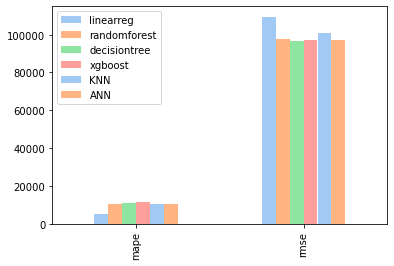

In [224]:
# Note: multiplying the Mape with 1000 for visualization purposes
error_rec = {
    "linearreg": {
        "mape": LR_MAPE_test*1000,
        "rmse": LR_RMSE_test,
        
    },
    "randomforest": {
        "mape": RF_MAPE_train*1000,
        "rmse":RF_RMSE_train
    },
    "decisiontree": {
        "mape": DT_MAPE_test*1000,
        "rmse": DT_RMSE_test,
            },
    "xgboost": {
        "mape":XGB_MAPE_test*1000 ,
        "rmse": XGB_RMSE_test,
        
    },
    "KNN":{
        "mape": knn_MAPE_test*1000,
        "rmse":knn_RMSE_test
    },
    "ANN":{
        "mape": ann_MAPE_test*1000,
        "rmse": ann_RMSE_test,
    }
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

In [225]:
error_metrics = {
    "linearreg": {
        "mape": LR_MAPE_test,
        "rmse": LR_RMSE_test,
        
    },
    "randomforest": {
        "mape": RF_MAPE_train,
        "rmse":RF_RMSE_train
    },
    "decisiontree": {
        "mape": DT_MAPE_test,
        "rmse": DT_RMSE_test,
            },
    "xgboost": {
        "mape":XGB_MAPE_test ,
        "rmse": XGB_RMSE_test,
        
    },
    "KNN":{
        "mape": knn_MAPE_test,
        "rmse":knn_RMSE_test
    },
    "ANN":{
        "mape": ann_MAPE_test,
        "rmse": ann_RMSE_test,
    }
}

In [226]:
pd.DataFrame(error_metrics)

,linearreg,randomforest,decisiontree,xgboost,KNN,ANN
mape,5.231791,10.210821,11.098418,11.238178,10.531647,10.169818
rmse,109516.459822,97621.033090,96820.222050,97265.857535,101030.416648,97126.357787


### <font color ="blue">Conclusion</font>    
    1) The data is not so good. No correlation between target and features.
    2) Could not find patterns. Tried to use value based segmenting  and RFC segmenting to check if there is some pattern/ distribution to find the relationship between features and target. But all the segments have similar distribution 
    3) Feature Selection: When I use F regression all features expect one particular feature has p value greater than 0.05.
    4) Couldn't establish a linear relationship between target and features.<br>
    5) ANN is the best performing model<br>